# Exploratory Data Analysis

## 1. Import Packages and Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
from typing import List

In [3]:
# Helper function 
def show_missing(train: pd.DataFrame) -> pd.DataFrame:
    """Generate a summary of missing values and basic statistics for each column in a DataFrame.

    This function analyzes each column in the input DataFrame and returns a new DataFrame containing
    information about the variable names, data types, total count of entries, number of unique values,
    number of missing values, and the percentage of missing values.

    Args:
        train (pd.DataFrame): Input DataFrame to analyze for missing values and statistics.

    Returns:
        pd.DataFrame: A DataFrame with the following columns:
            - variable: Name of the column in the input DataFrame.
            - dtype: Data type of the column.
            - count: Total number of entries in the column.
            - unique: Number of unique values in the column.
            - missing: Number of missing (NaN) values in the column.
            - pc_missing: Percentage of missing values in the column, rounded to the nearest integer.

    Notes:
        - The percentage of missing values is calculated as (missing count / total count) * 100.
        - The function handles all columns regardless of their data type.
    """
    variables: List[str] = []
    dtypes: List[pd.api.types.Dtype] = []
    count: List[int] = []
    unique: List[int] = []
    missing: List[int] = []
    pc_missing: List[int] = []

    for item in train.columns:
        variables.append(item)
        dtypes.append(train[item].dtype)
        count.append(len(train[item]))
        unique.append(len(train[item].unique()))
        missing.append(train[item].isna().sum())
        pc_missing.append(round((train[item].isna().sum() / len(train[item]) * 100)))

    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing,
        'pc_missing': pc_missing
    })

    return output

## 2. Reading the Data

In [5]:
data = pd.read_csv(r"..\data\01_raw\diabetic_data.csv")

In [6]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## 3. Overview

In [34]:
data.shape

(101766, 50)

In [36]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
missing_data = show_missing(data)
sorted_missing_data = missing_data.sort_values(by="missing", ascending=False)
sorted_missing_data

,variable,dtype,count,unique,missing,pc_missing
22,max_glu_serum,object,101766,4,96420,95
23,A1Cresult,object,101766,4,84748,83
0,encounter_id,int64,101766,101766,0,0
26,nateglinide,object,101766,4,0,0
28,glimepiride,object,101766,4,0,0
29,acetohexamide,object,101766,2,0,0
30,glipizide,object,101766,4,0,0
31,glyburide,object,101766,4,0,0
32,tolbutamide,object,101766,2,0,0
33,pioglitazone,object,101766,4,0,0


In [54]:
data[data.duplicated()]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [12]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
int_cols = data.select_dtypes(include='int64').columns.tolist()

id_cols = ['encounter_id', 'patient_nbr']
categorical_int_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

numeric_cols = [col for col in int_cols if col not in id_cols]

numeric_cols = [
    col for col in int_cols 
    if col not in id_cols and col not in categorical_int_cols 
]

categorical_cols += categorical_int_cols 


## 4. Univariate Feature Analysis

### 4.1. Categorical Features

In [75]:
categorical_data = data[categorical_cols]

In [77]:
categorical_data.astype("category").describe().T

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,5346,3,Norm,2597


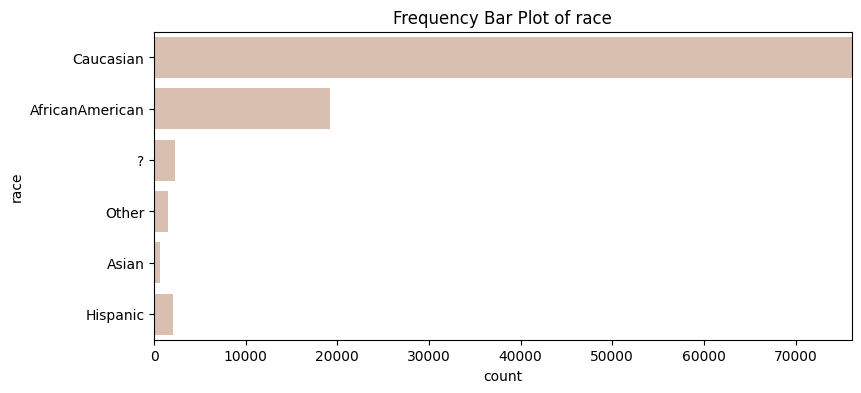

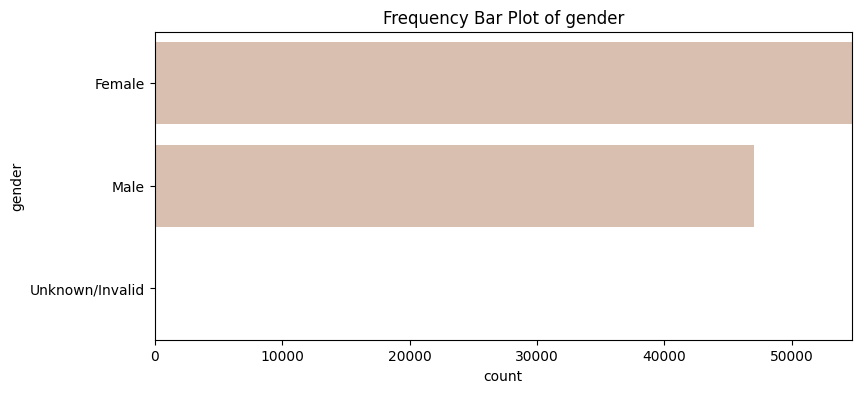

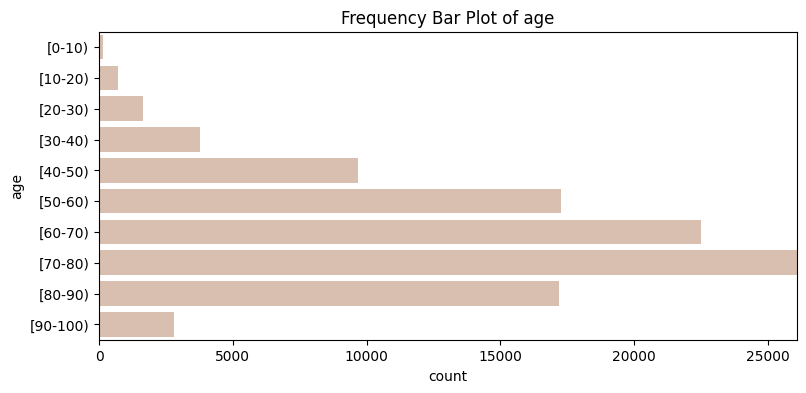

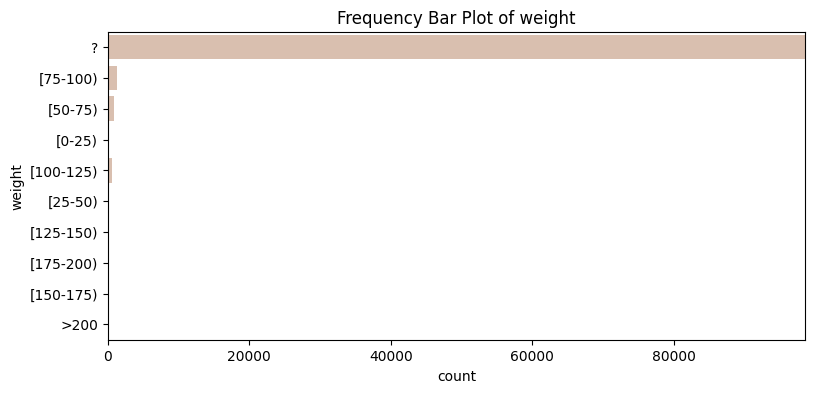

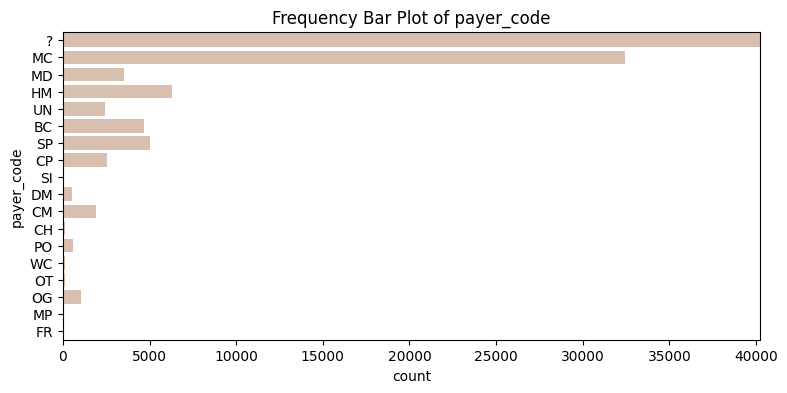

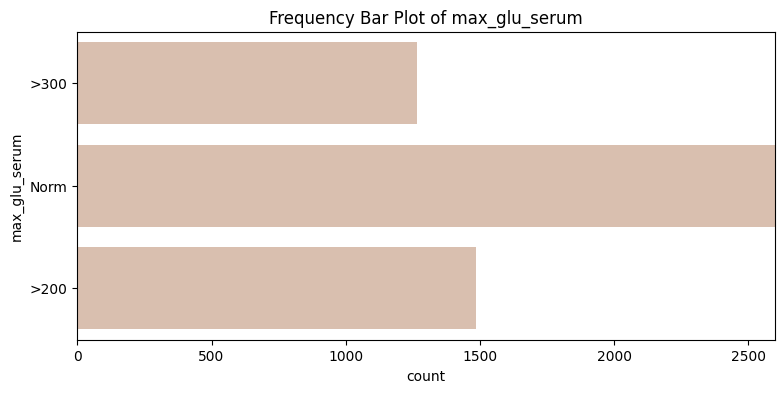

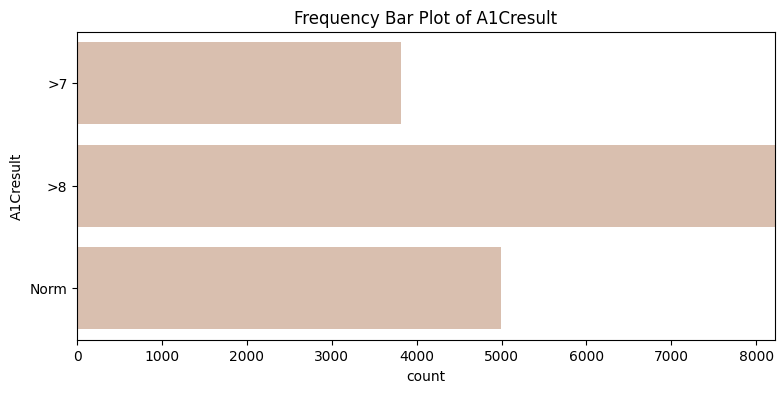

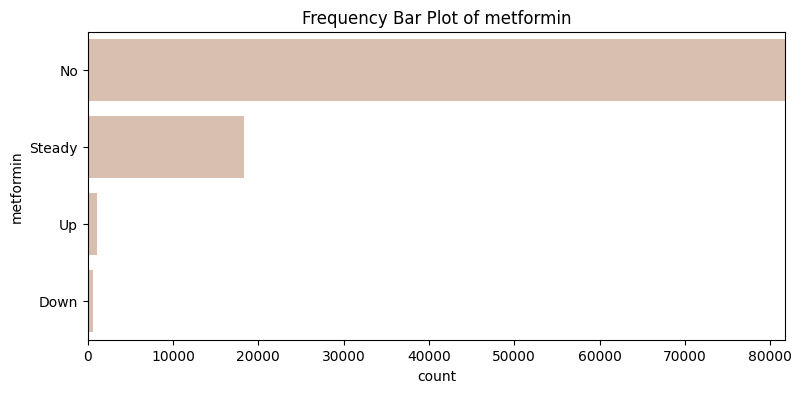

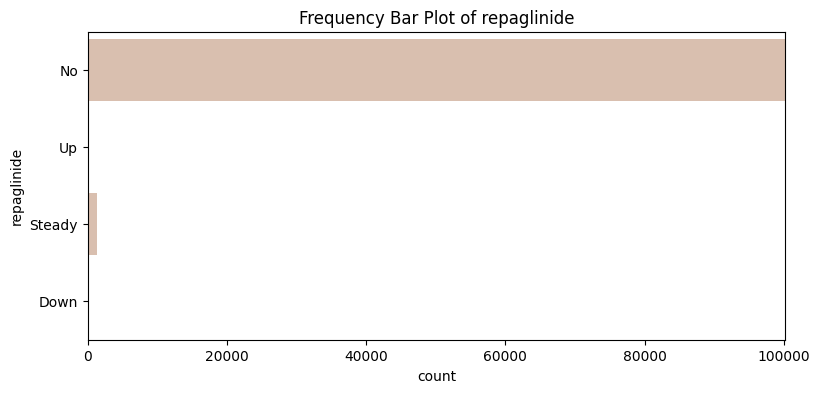

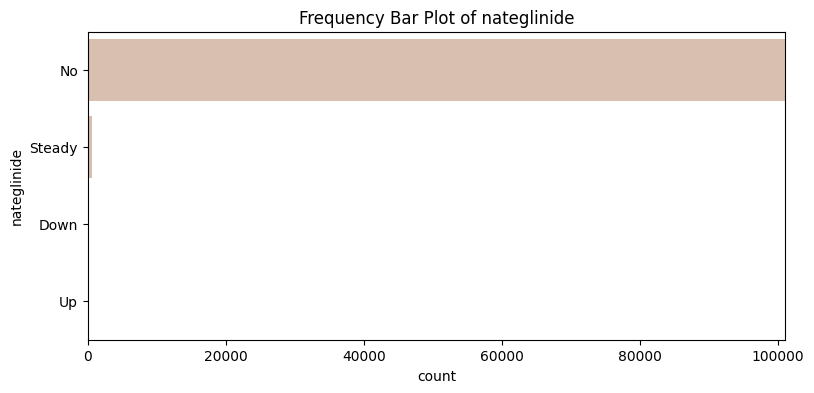

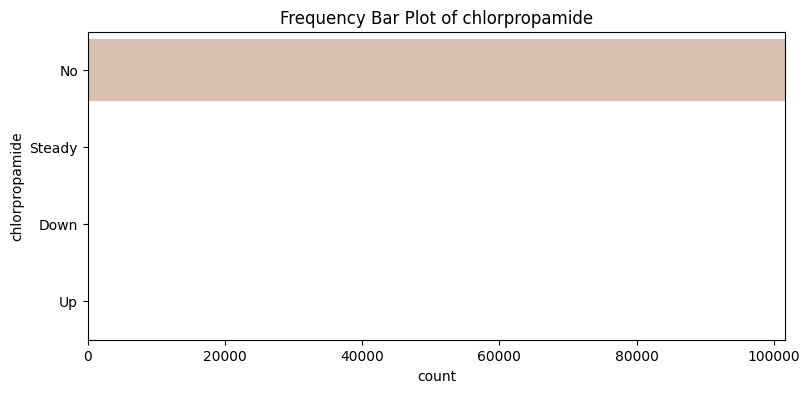

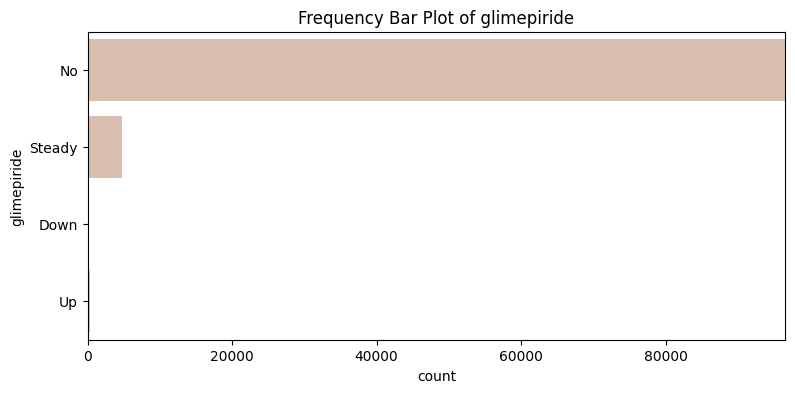

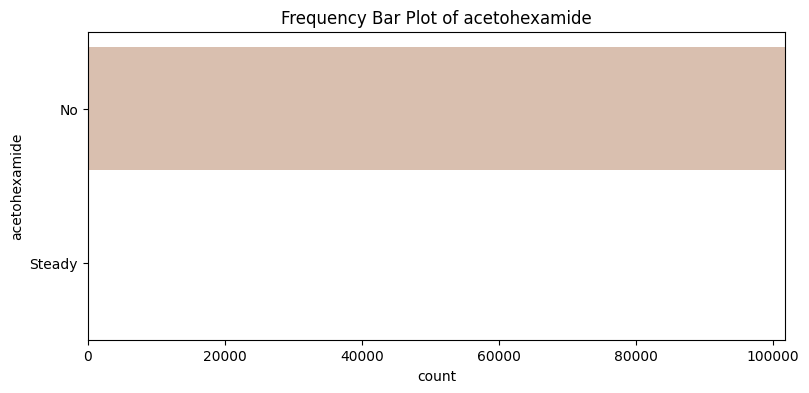

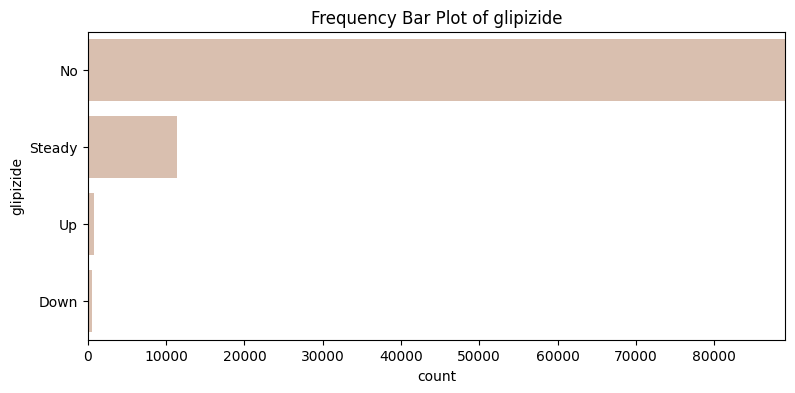

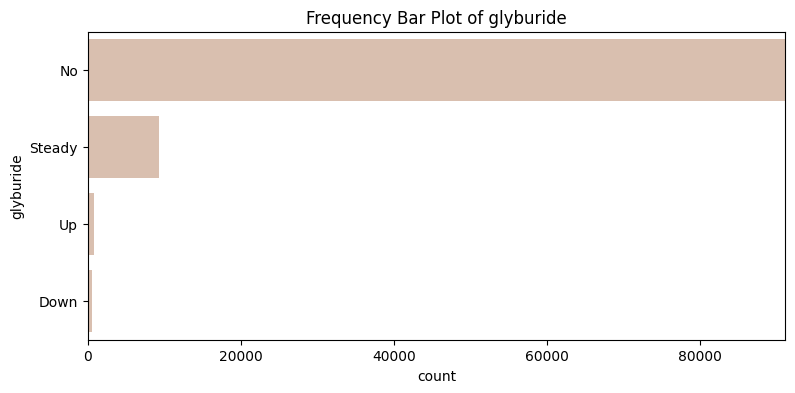

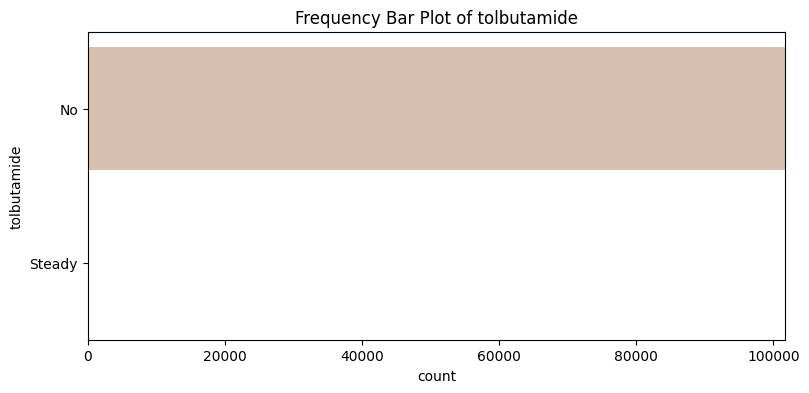

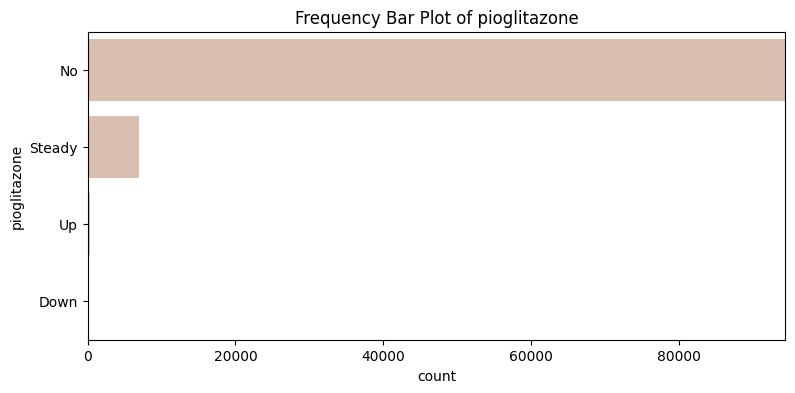

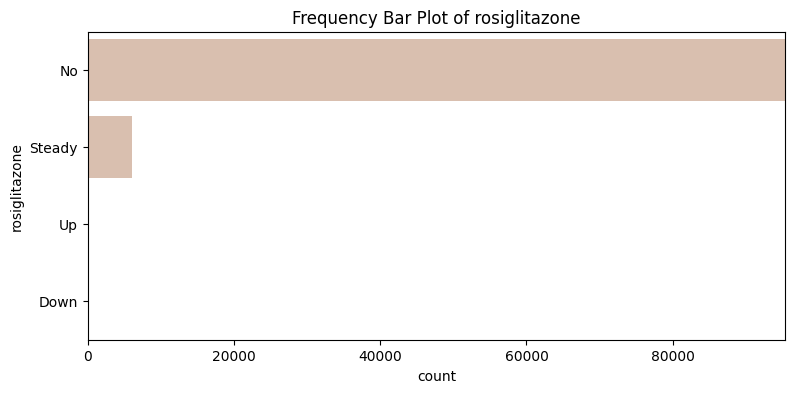

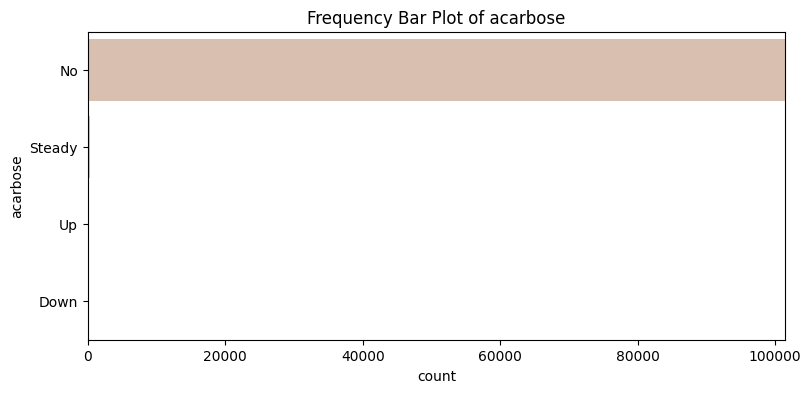

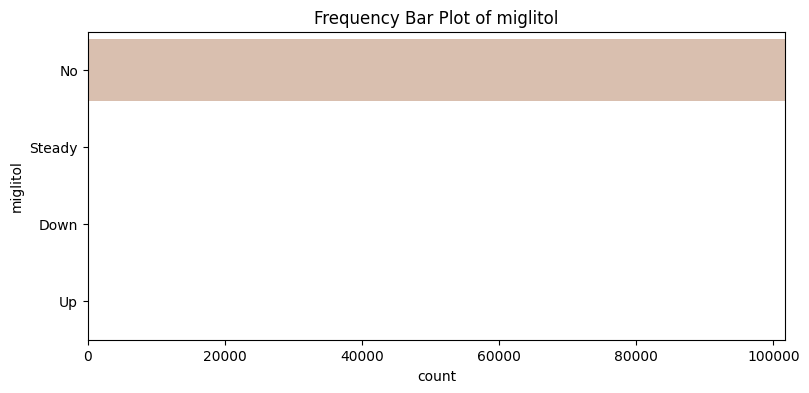

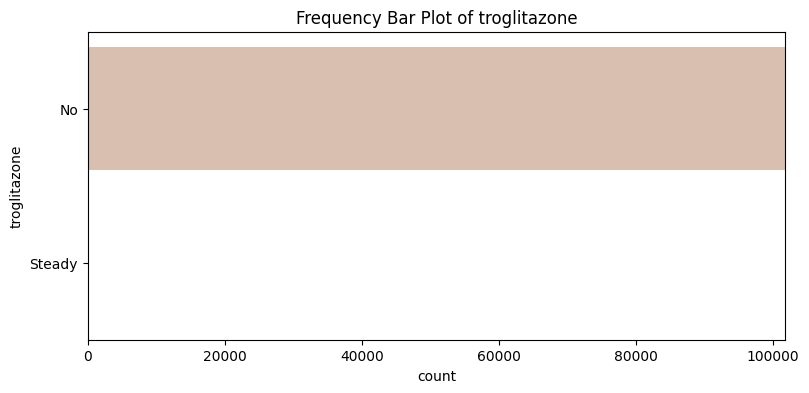

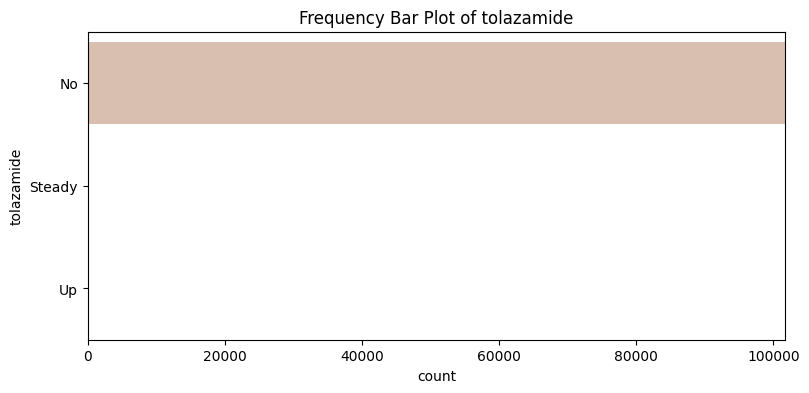

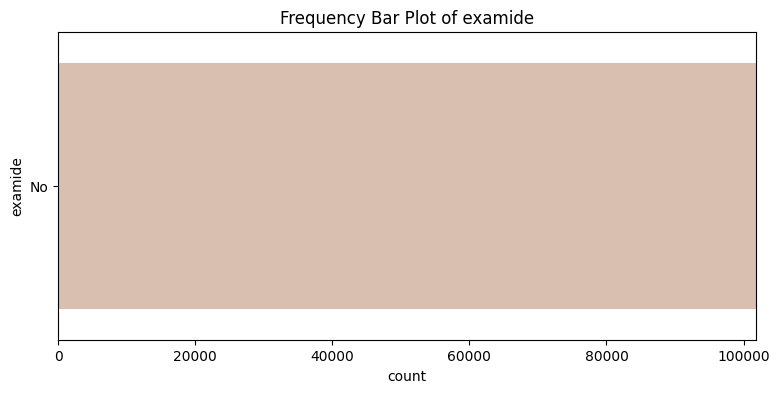

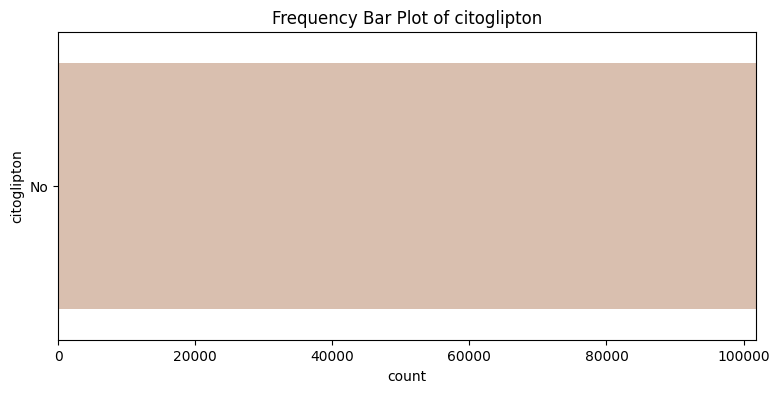

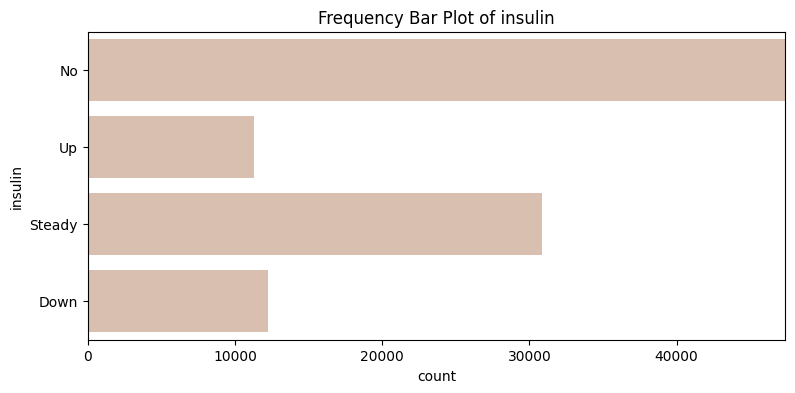

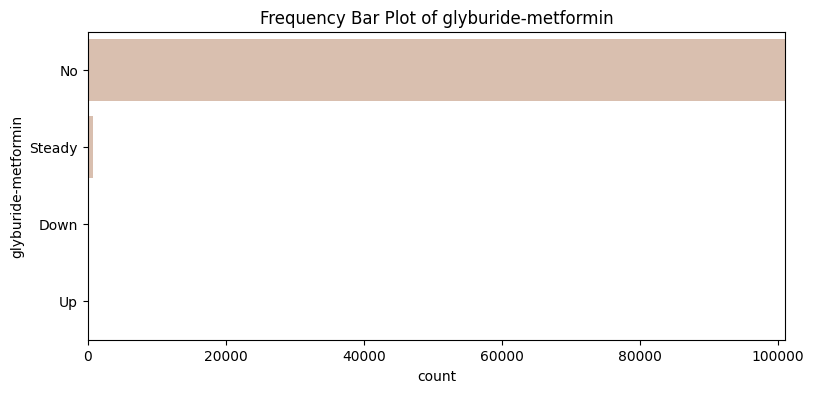

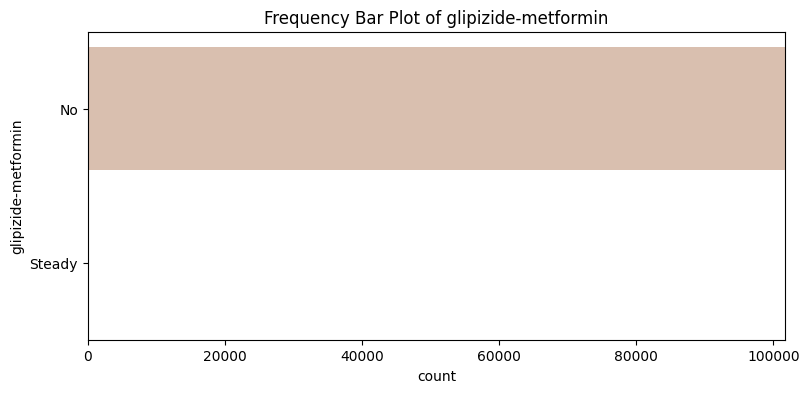

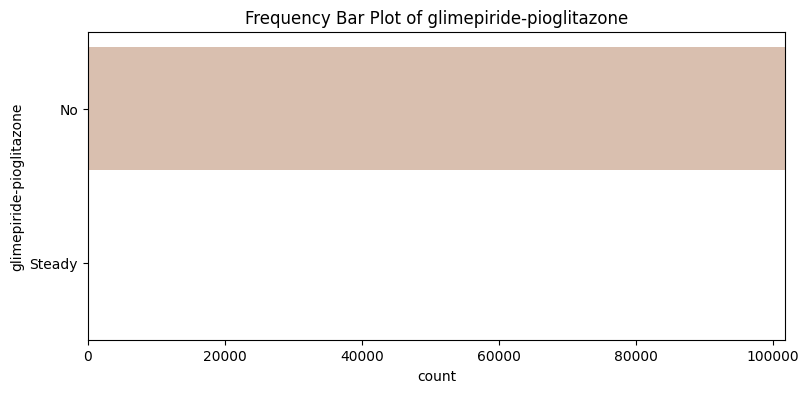

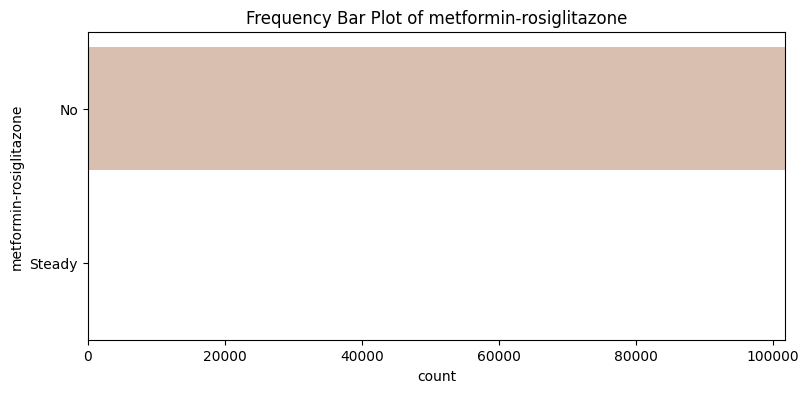

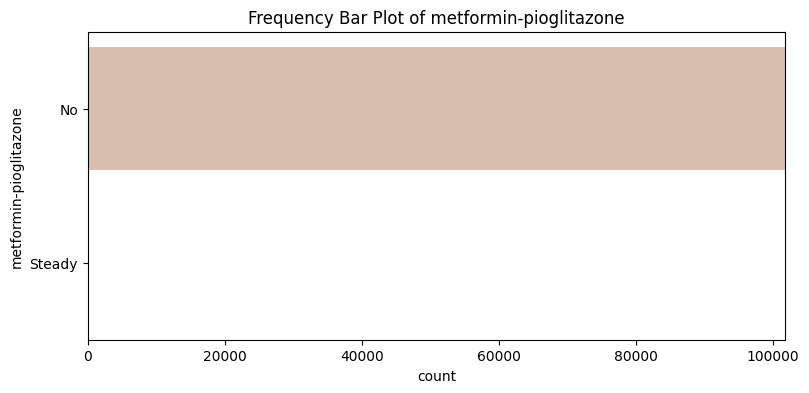

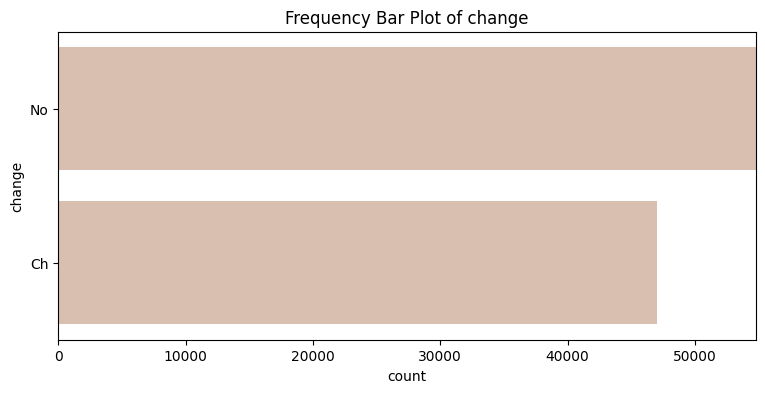

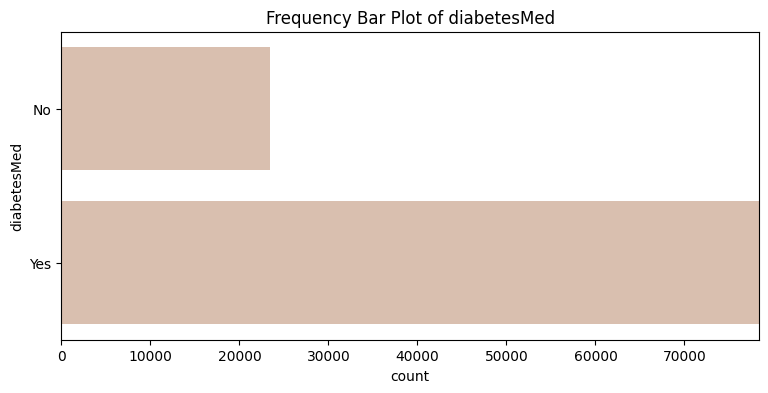

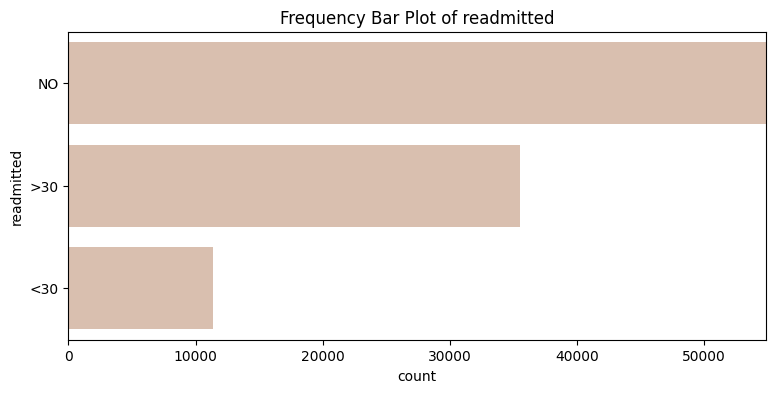

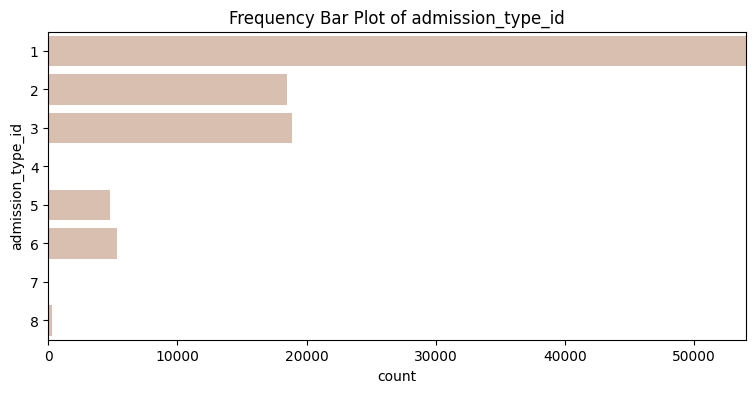

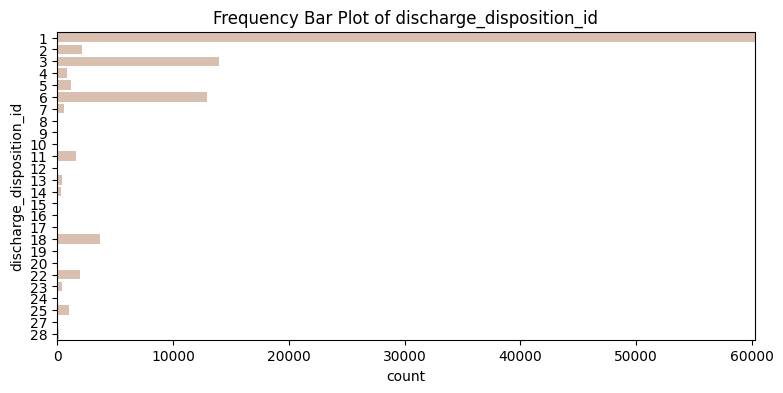

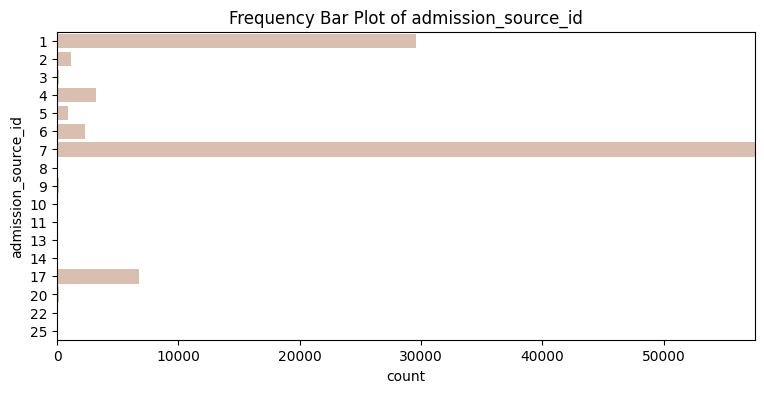

In [101]:
# Loop through the non-high-cardinality categorical features
for var in categorical_cols:
    if data[var].nunique()<30:
        fig, ax = plt.subplots(figsize=(9, 4))

        # Create a horizontal count plot for categorical data
        sns.countplot(data=data[categorical_cols], y=var, ax=ax, color="#e0bda8")

        # Set title
        ax.set_title(f"Frequency Bar Plot of {var}")

        # Calculate counts for setting x-axis limit
        counts = data[var].value_counts()

        # Set x-axis limit based on the counts
        if not counts.empty:
            ax.set_xlim(0, counts.max() + 1)  # Add a little space to the right of max count
        else:
            ax.set_xlim(0, 1)  # Set a default limit if no data is available

        # Show the plot
        plt.show()

### 4.2. Numeric Features

In [109]:
data[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0
number_diagnoses,101766.0,7.422607,1.933600,1.0,6.0,8.0,9.0,16.0


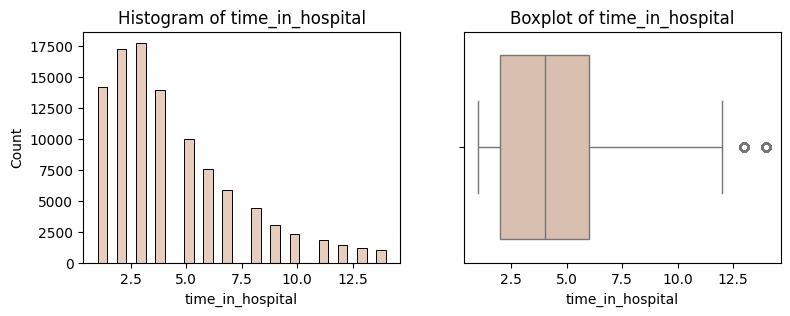

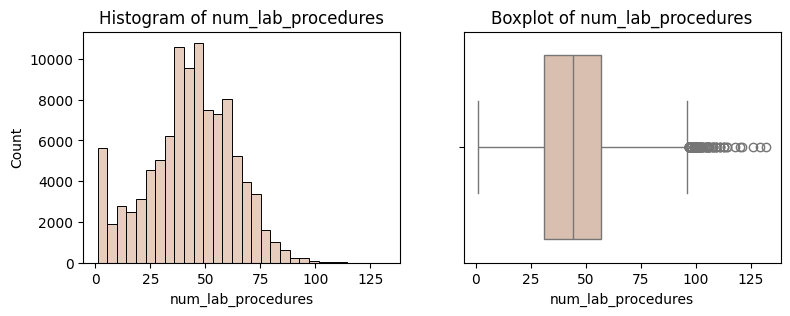

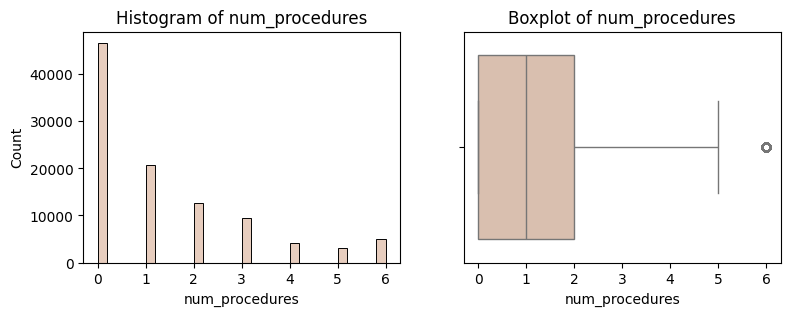

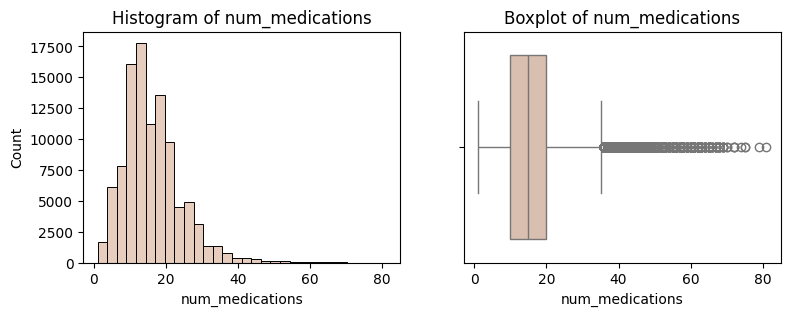

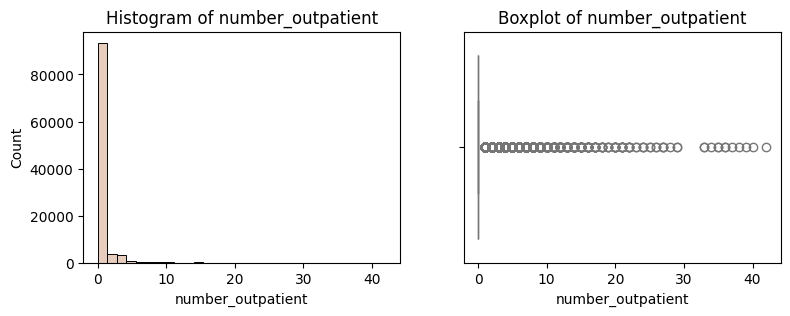

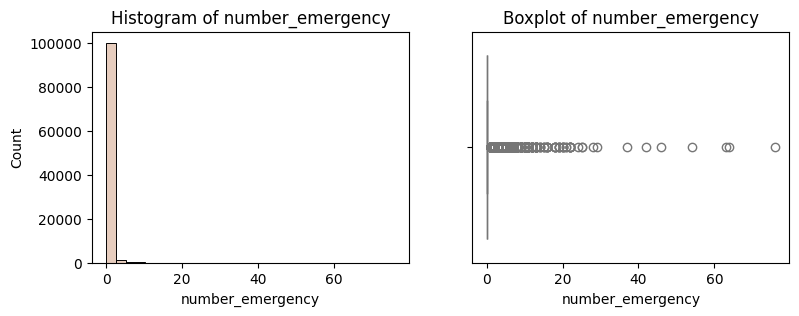

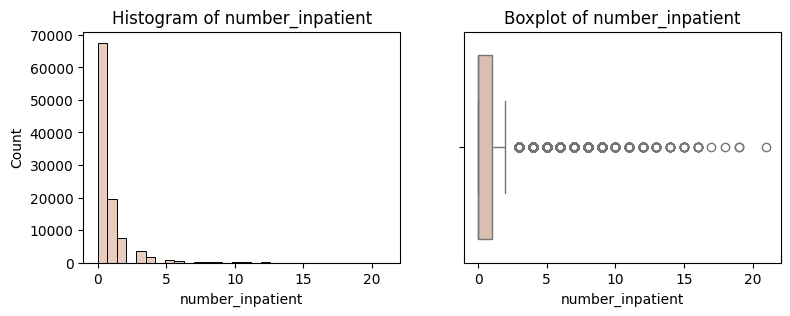

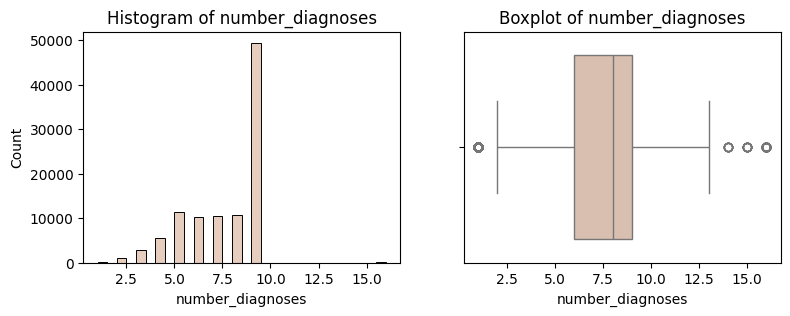

In [113]:
for var in numeric_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

    # create histogram
    sns.histplot(ax=ax1, x=data[var], bins=30, color="#e0bda8")
    ax1.set_title(f"Histogram of {var}")

    # create boxplot
    sns.boxplot(ax=ax2, x=data[var], color="#e0bda8")
    ax2.set_title(f"Boxplot of {var}")

    plt.show()


## 5. Bivariate Feature Analysis 

### 5.1. Categorical Features

In [154]:
def plot_categorical_target_relation_horizontal(df, categorical_var, target_var):
    missing_percentage = df[categorical_var].isna().mean() * 100
    df_copy = df.copy()
    df_copy[categorical_var] = df_copy[categorical_var].fillna("Missing")
    df_copy[target_var] = df_copy[target_var].fillna("Missing")
    count_data = df_copy.groupby([categorical_var, target_var], observed=False).size().unstack(fill_value=0)
    percent_data = count_data.apply(lambda x: x / x.sum() * 100, axis=1)
    categories = df_copy[categorical_var].unique()
    target_categories = df_copy[target_var].unique()
    sorted_categories = ["Missing"] + sorted([cat for cat in categories if cat != "Missing"], reverse=True)
    sorted_target_categories = sorted([cat for cat in target_categories if cat != "Missing"]) + ["Missing"]
    count_data = count_data.reindex(sorted_categories, axis=0, fill_value=0)
    count_data = count_data.reindex(sorted_target_categories, axis=1, fill_value=0)
    percent_data = percent_data.reindex(sorted_categories, axis=0, fill_value=0)
    percent_data = percent_data.reindex(sorted_target_categories, axis=1, fill_value=0)
    ax = percent_data.plot(kind="barh", stacked=True, figsize=(12,7), colormap="RdYlBu")
    plt.title(f"Relation between {categorical_var} and {target_var} (percentage)", pad=20)
    plt.xlabel("Percentage")
    plt.ylabel(categorical_var)
    for i, (index, row) in enumerate(count_data.iterrows()):
        total_count = row.sum()
        cumulative_height = percent_data.loc[index].cumsum()
        ax.text(cumulative_height.iloc[-1] + 1, i, f"{int(total_count)}", ha="left", va="center", color="black", fontsize=10)
    if missing_percentage > 0:
        plt.figtext(0.9, 0.1, f"Missing: {missing_percentage:.2f}%", ha="right", fontsize=10, color="red")
    plt.legend(title=target_var, loc="center left", bbox_to_anchor=(1, 0.5))
    ax.set_xlim(0, 120)
    plt.tight_layout(pad=1.0)
    plt.show()


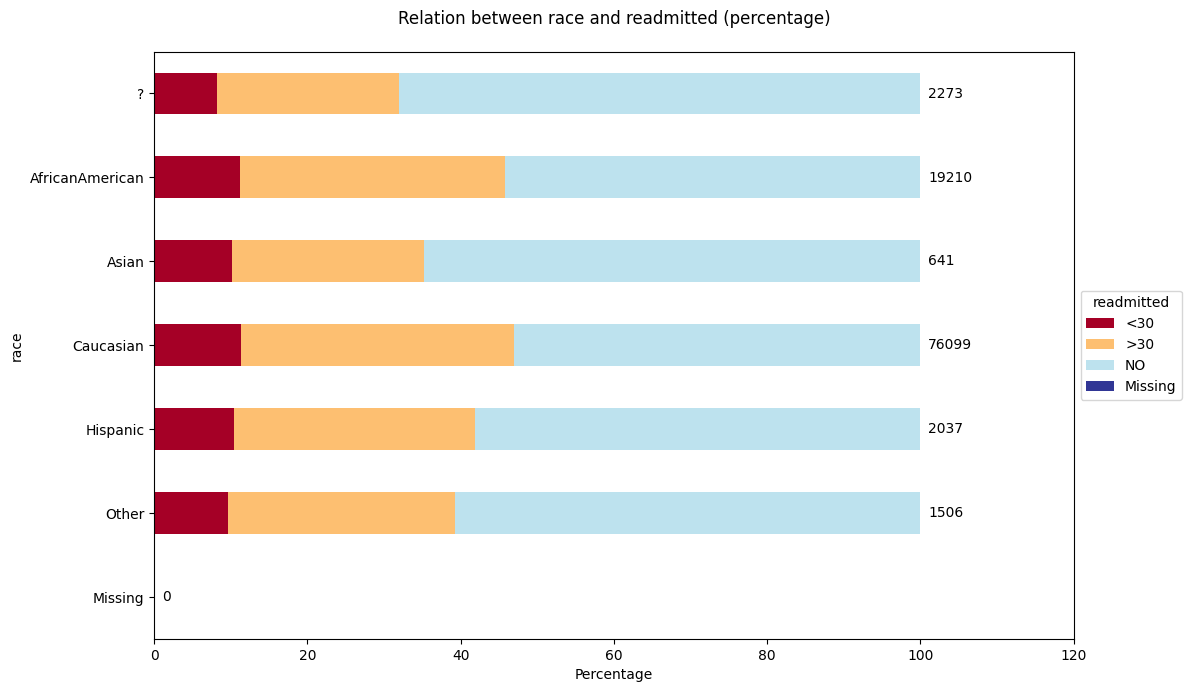

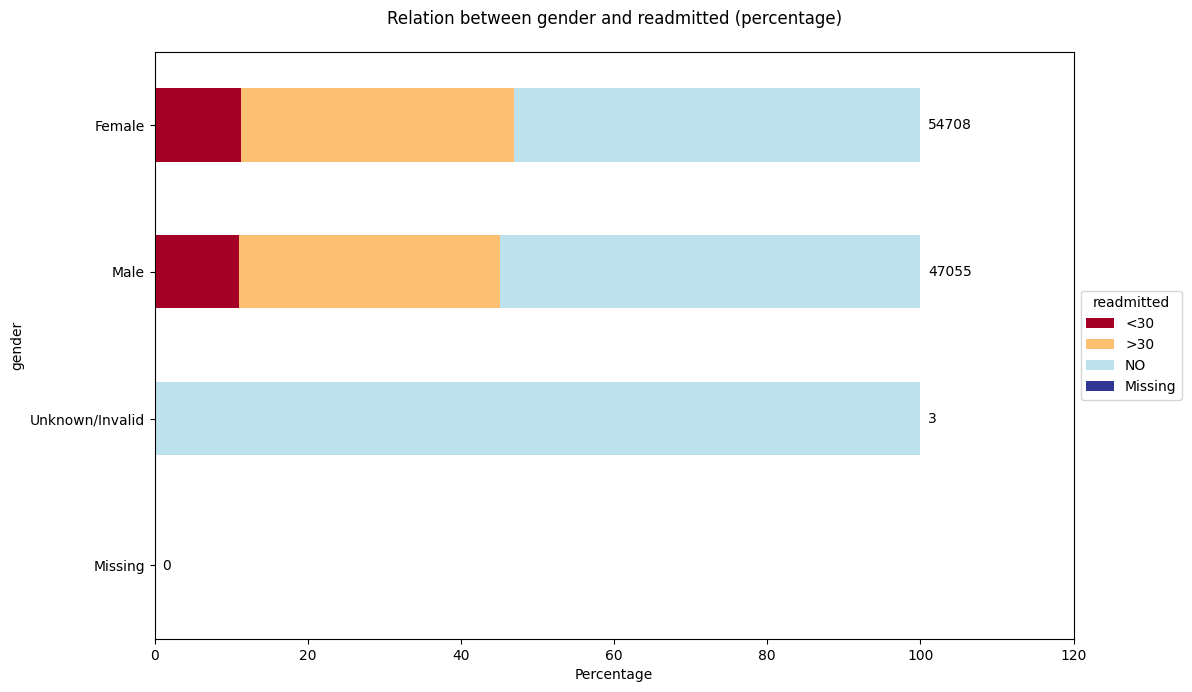

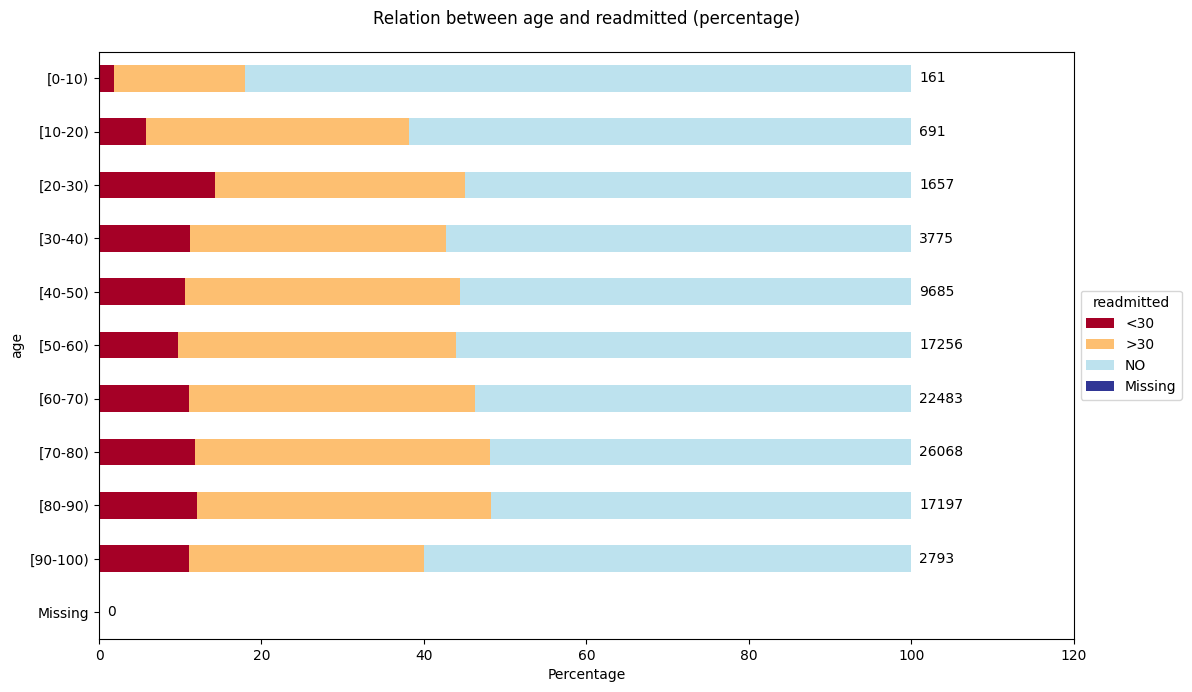

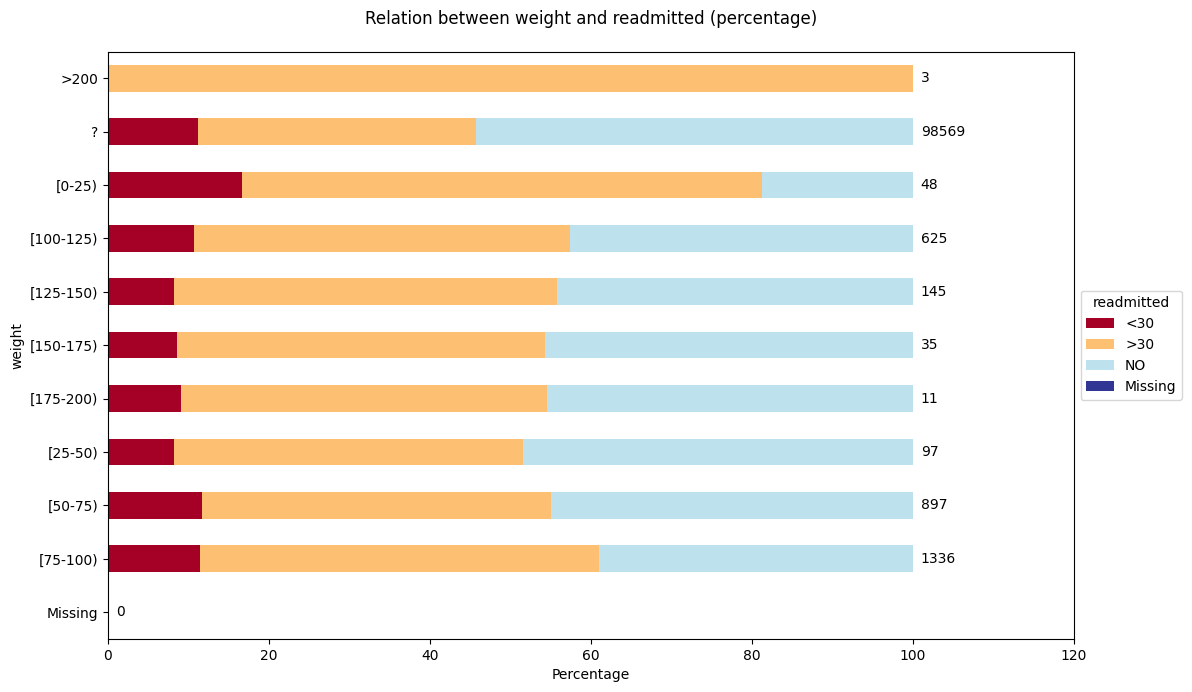

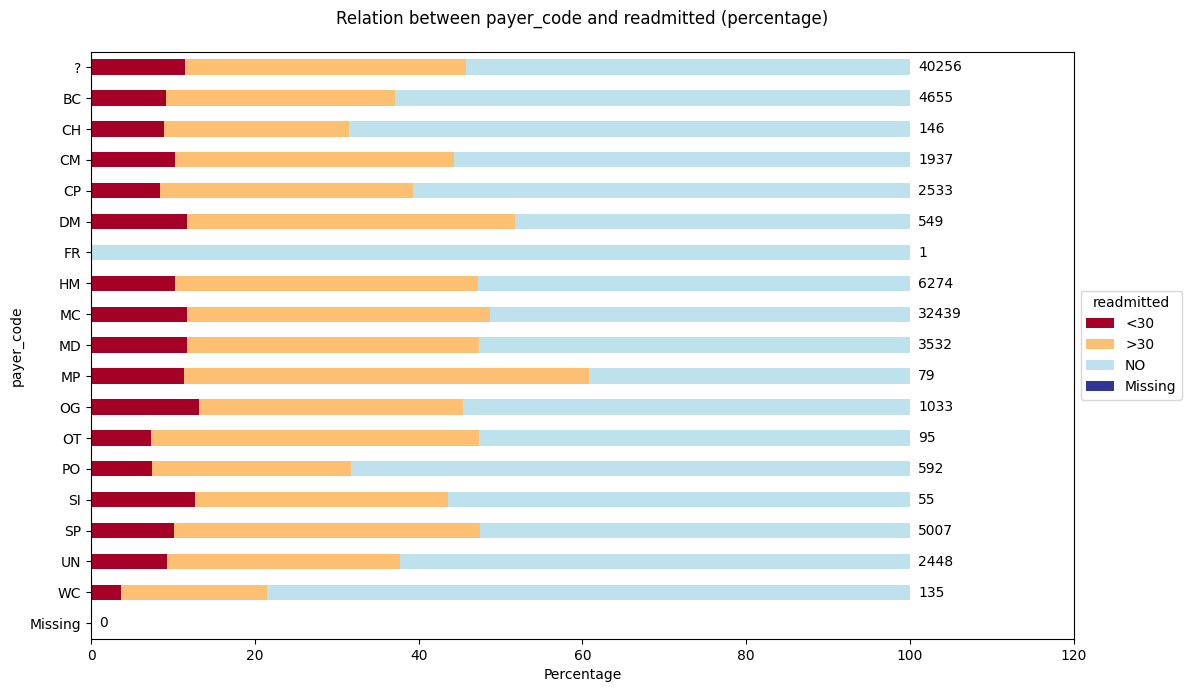

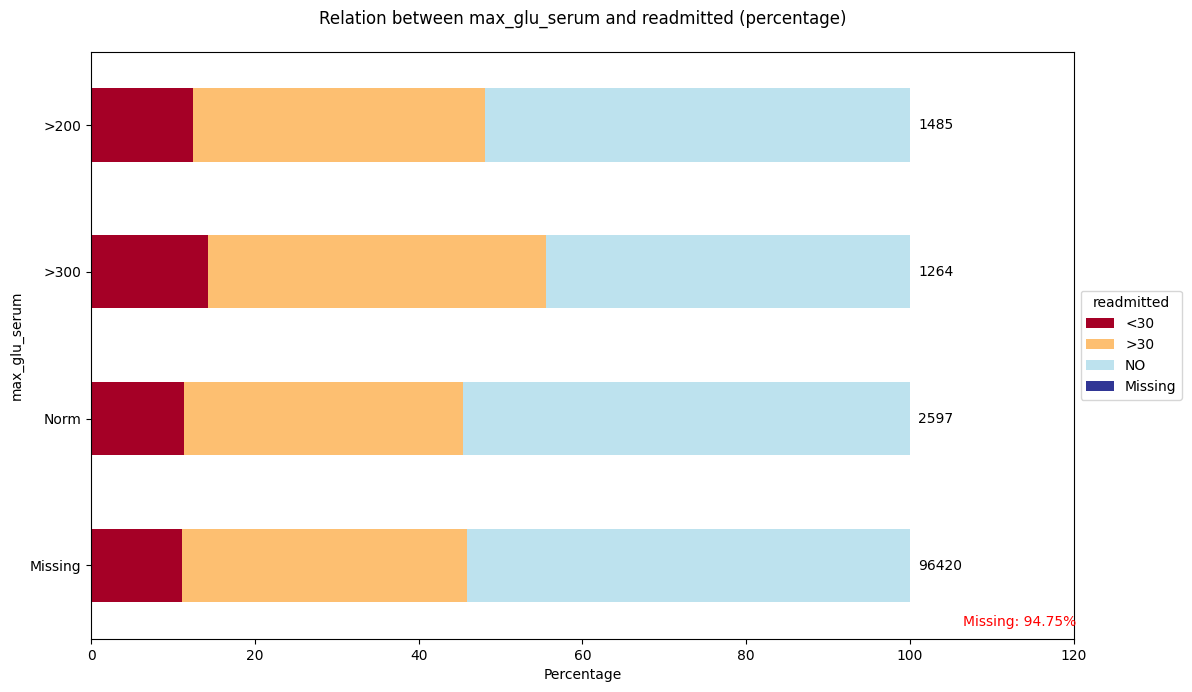

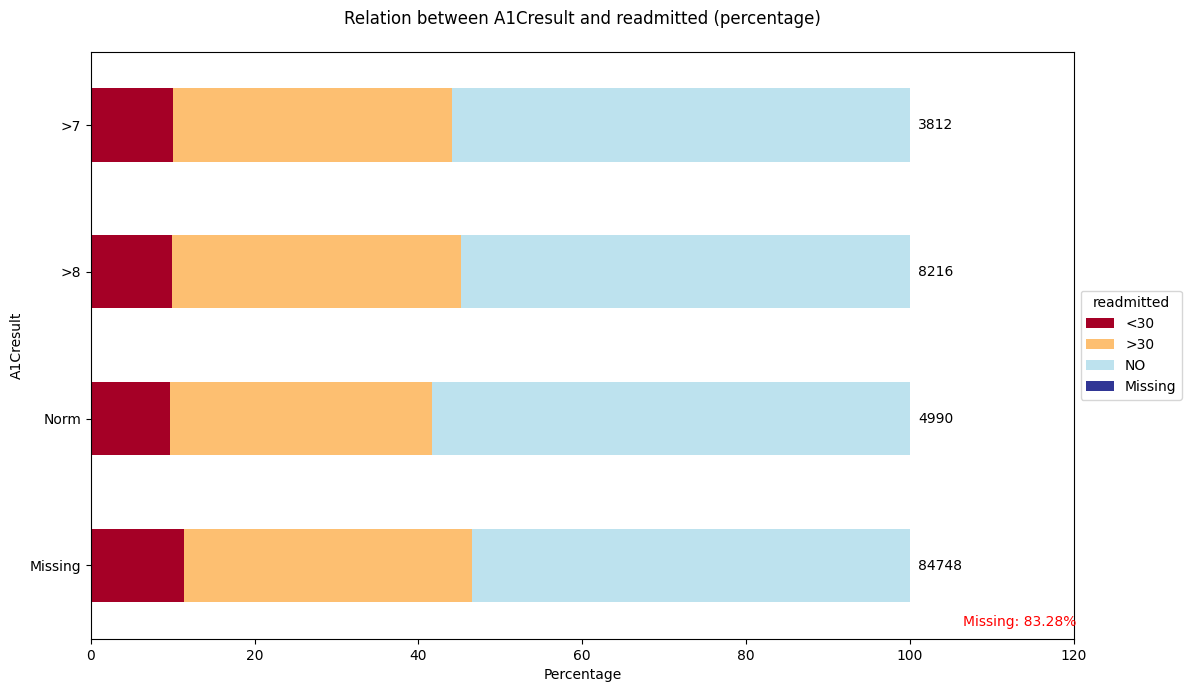

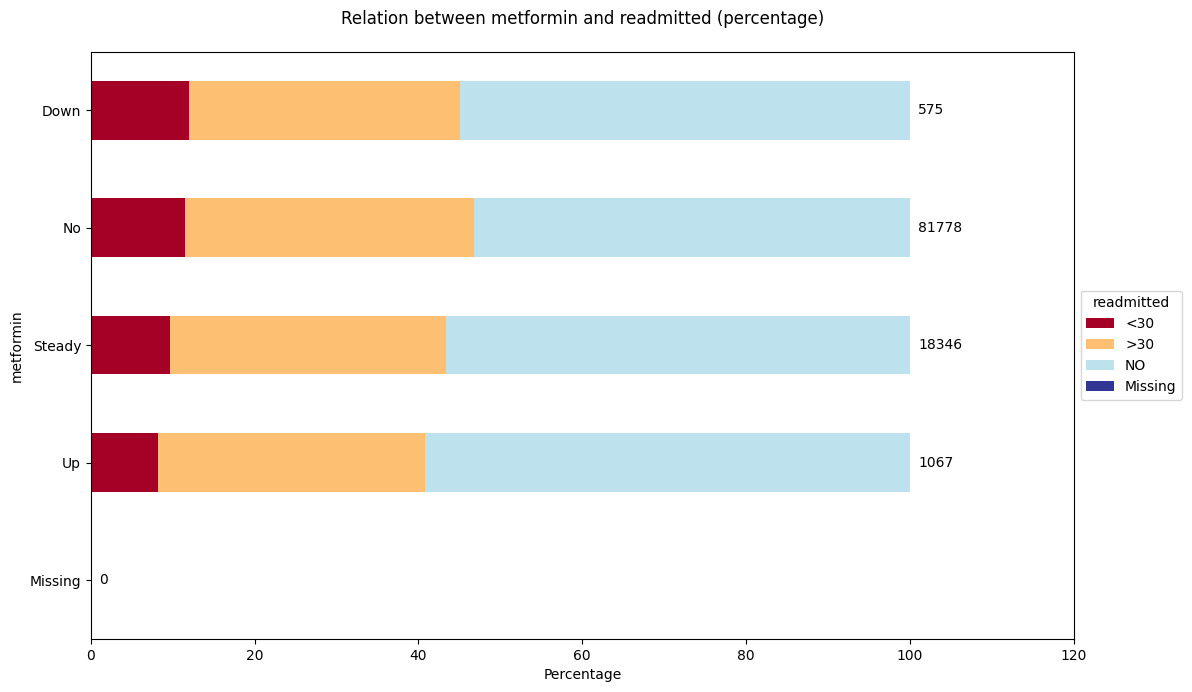

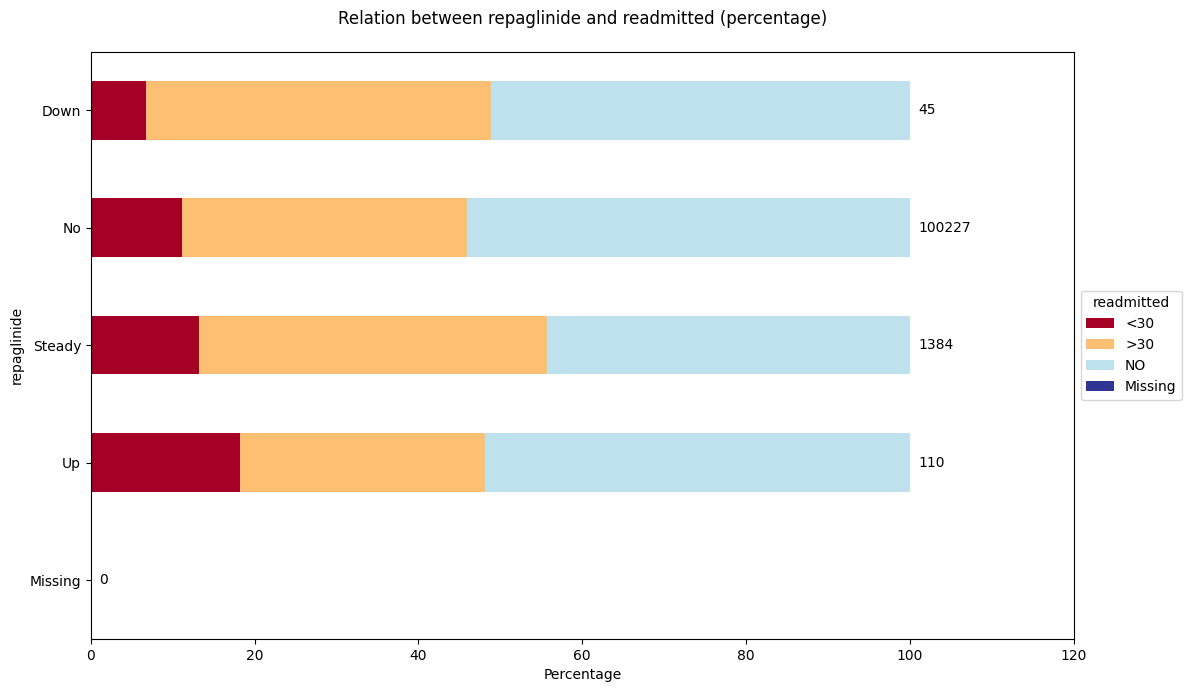

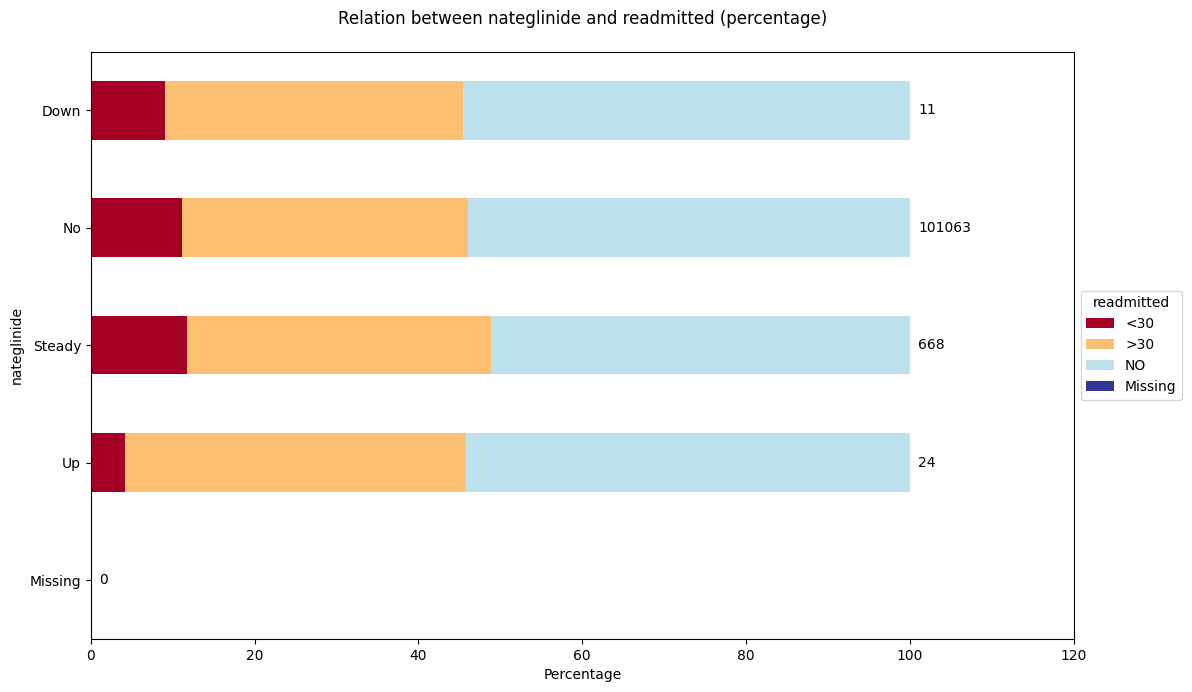

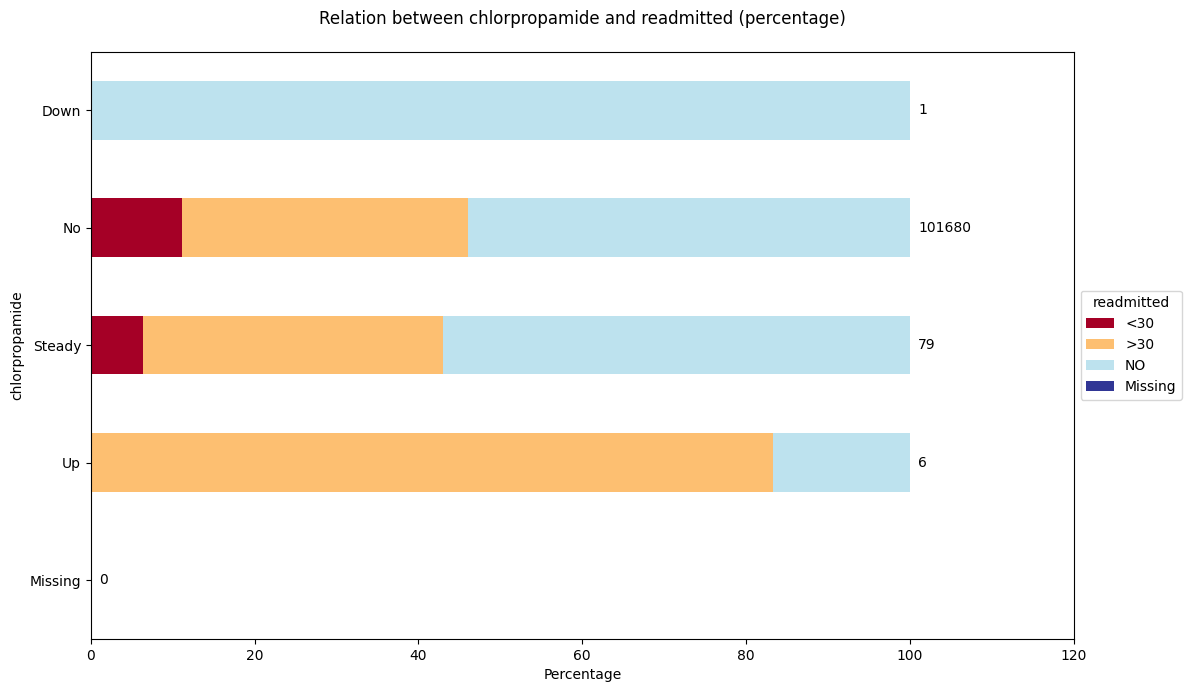

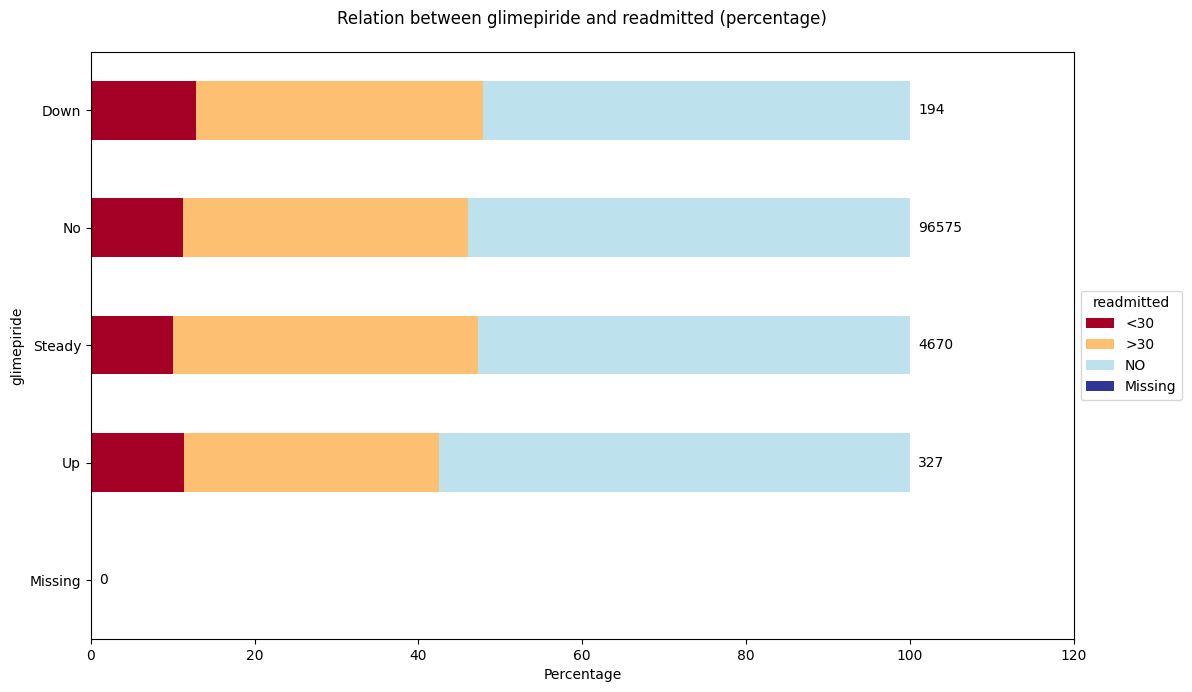

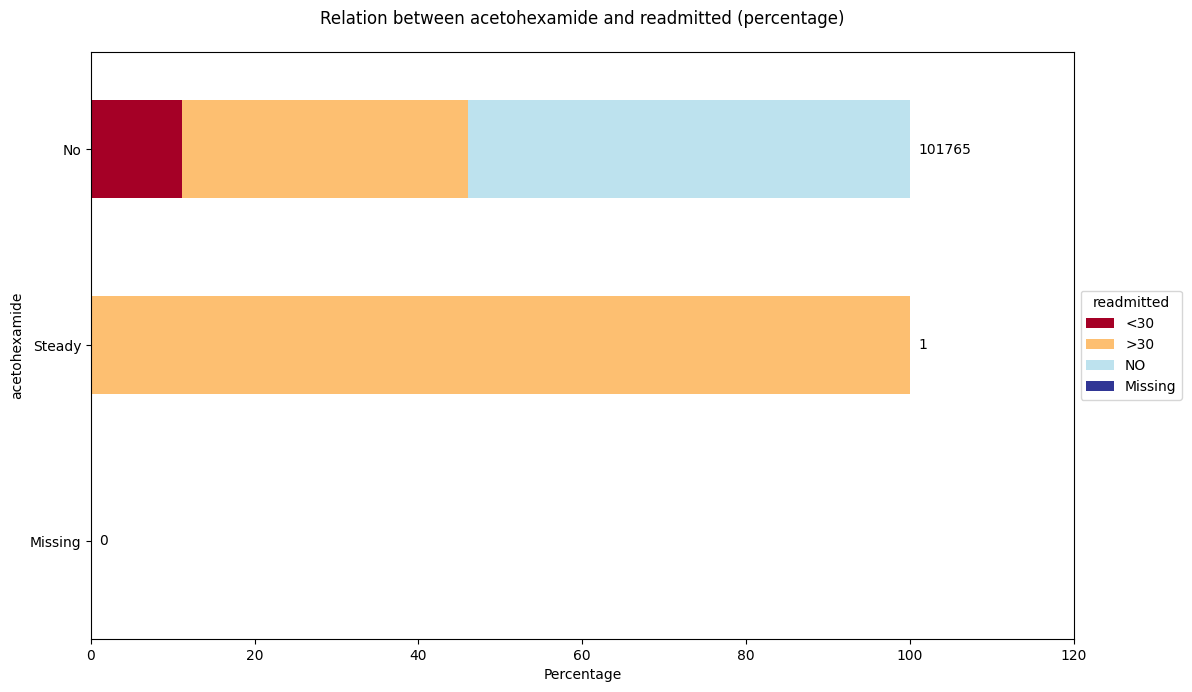

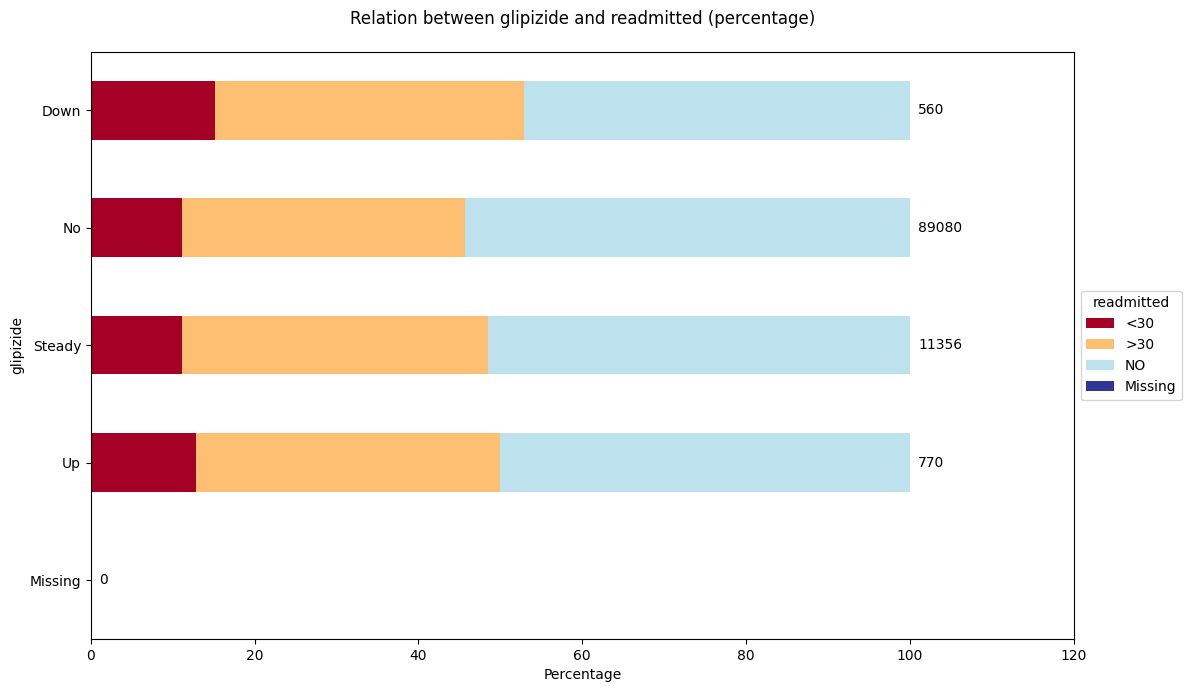

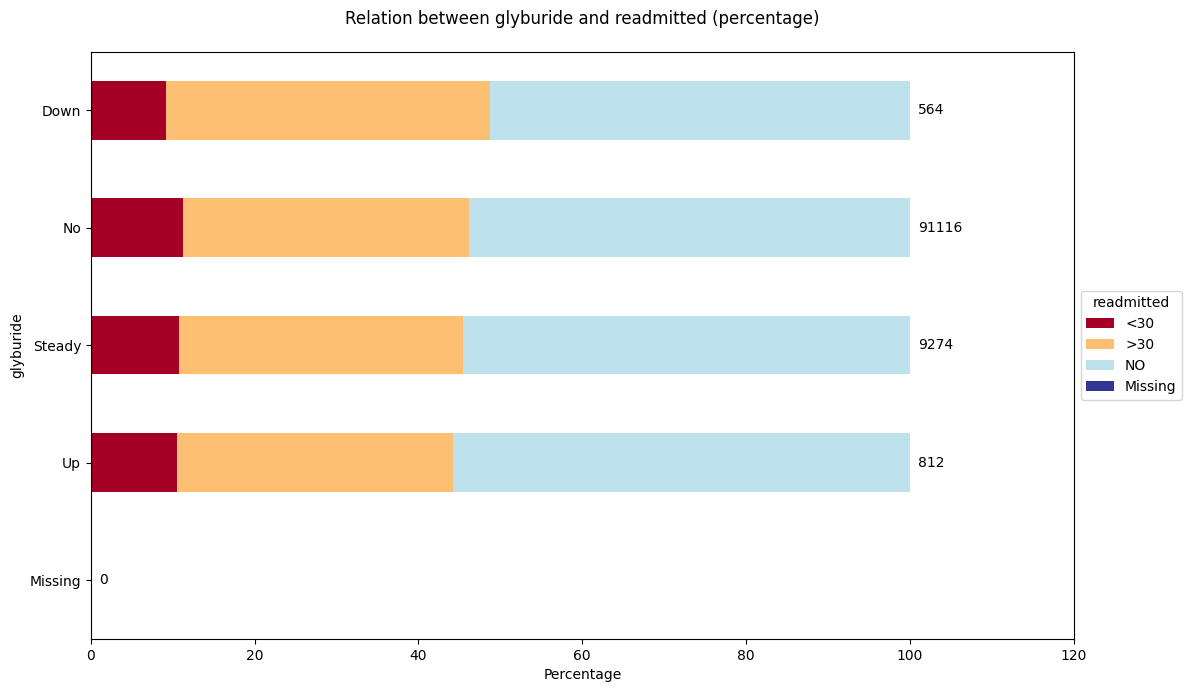

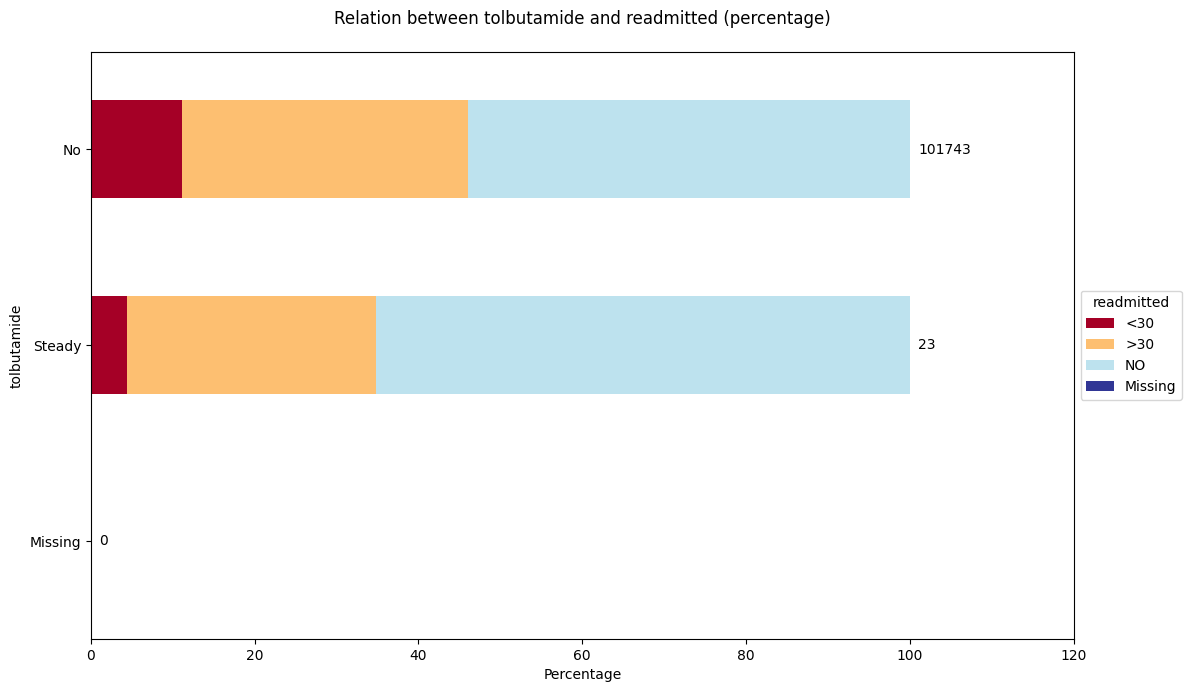

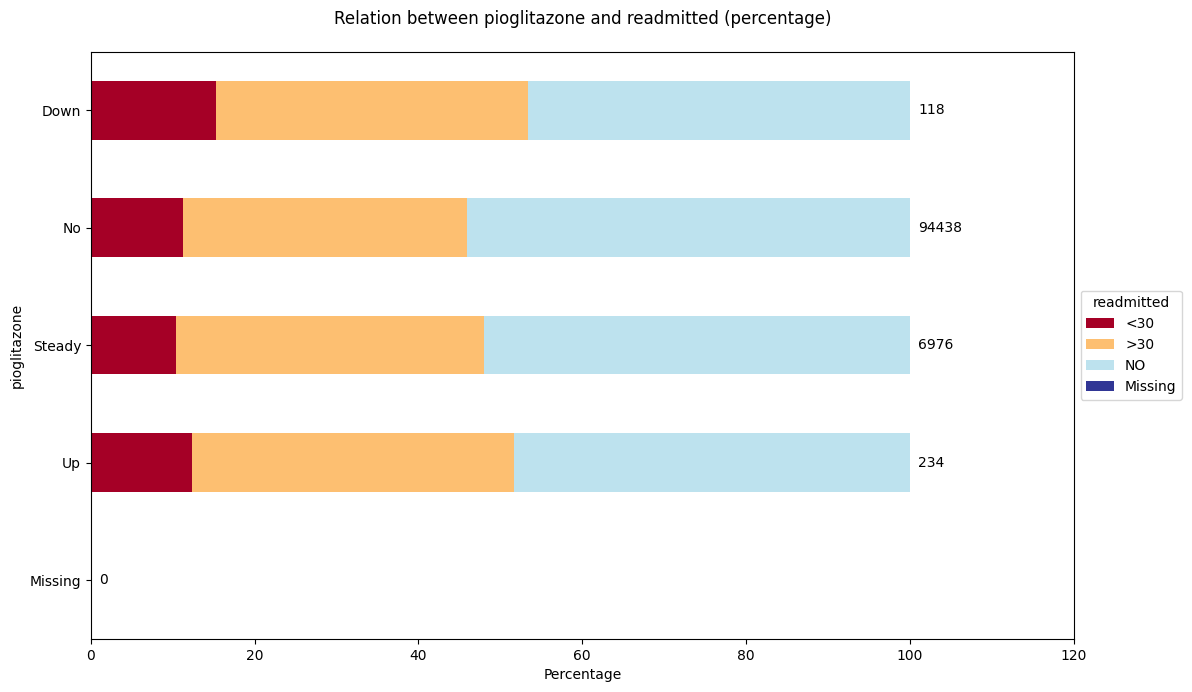

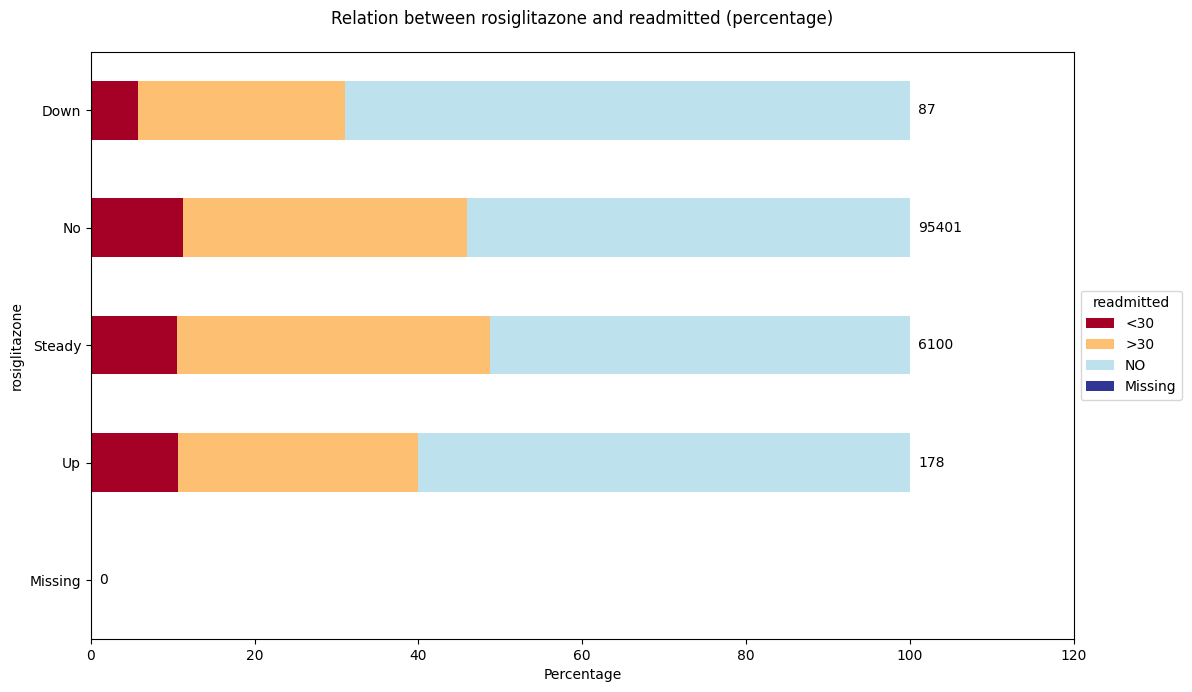

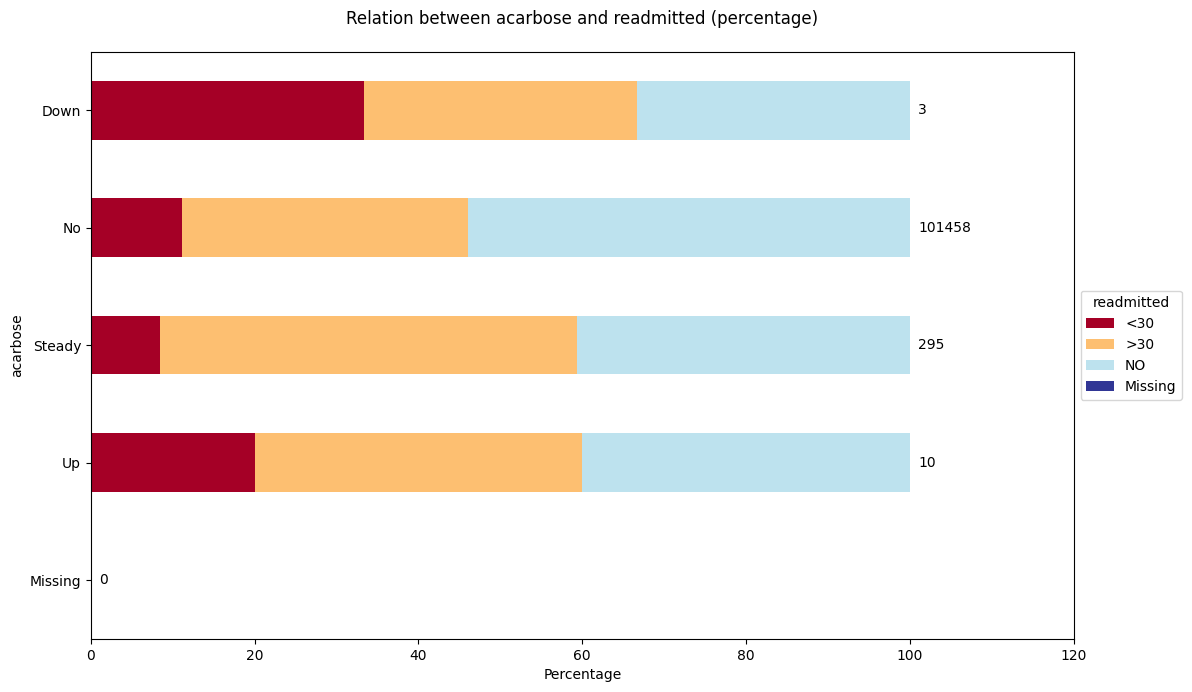

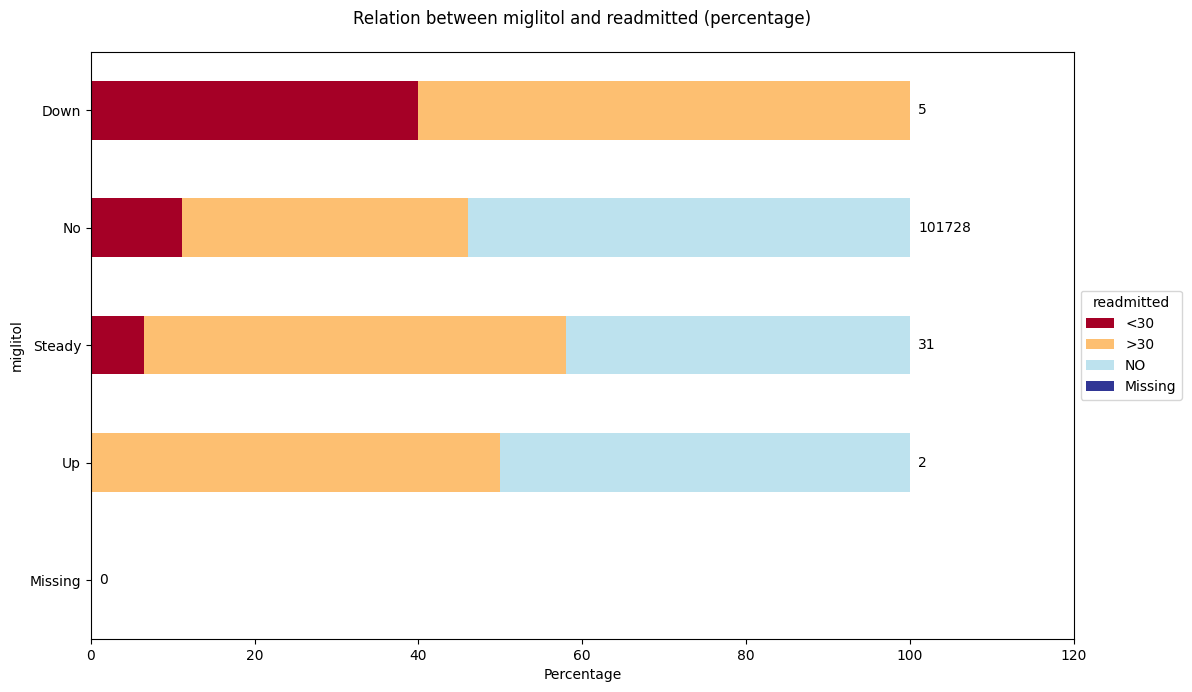

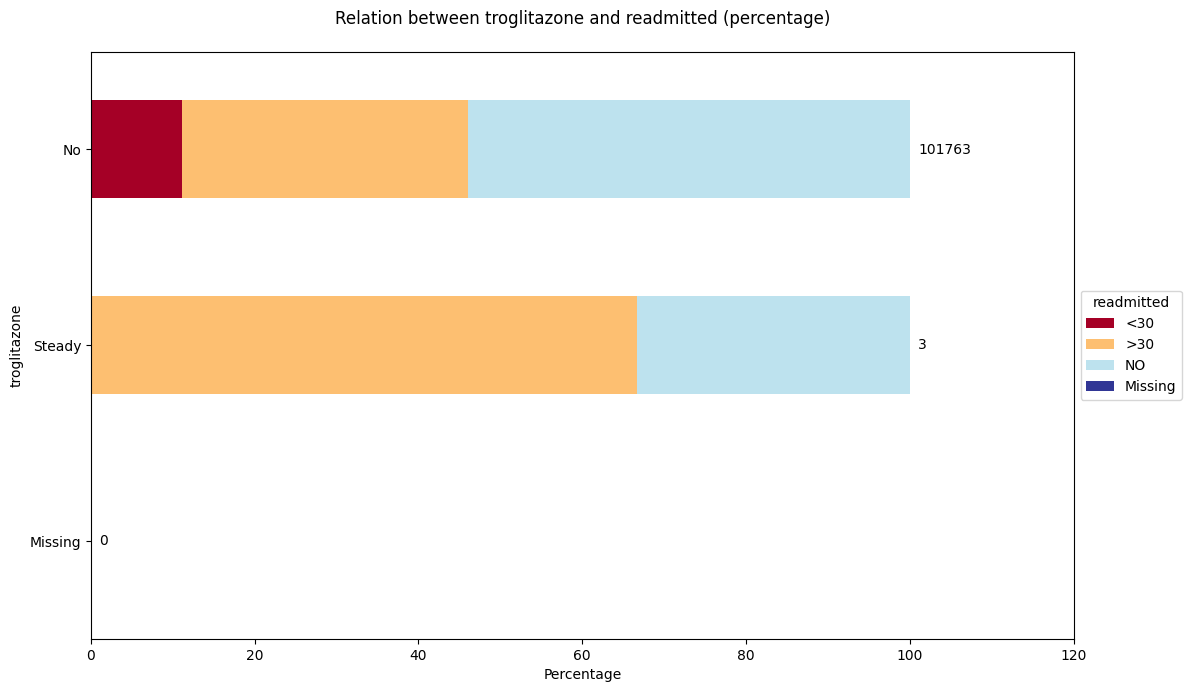

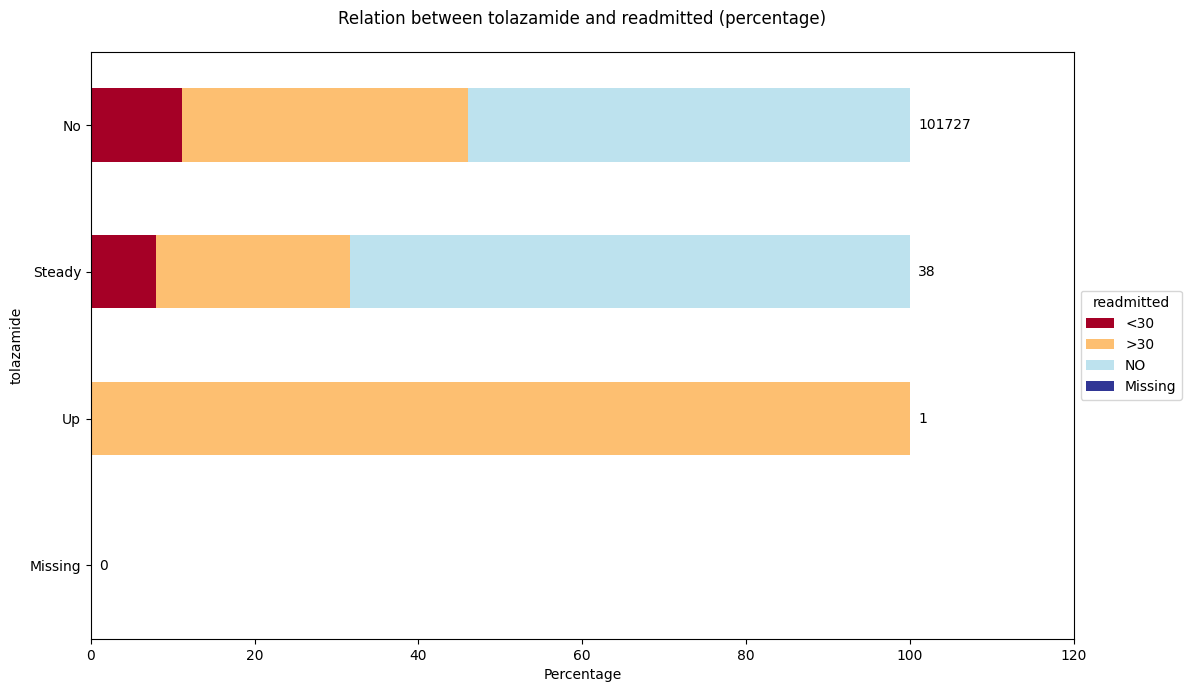

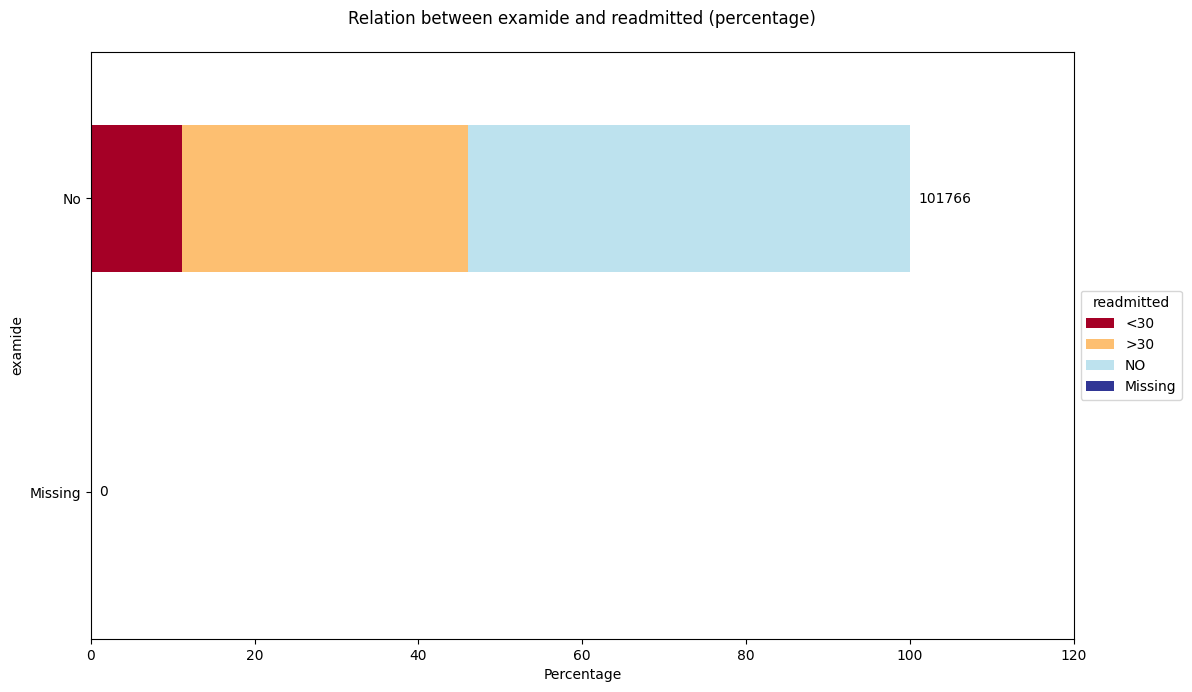

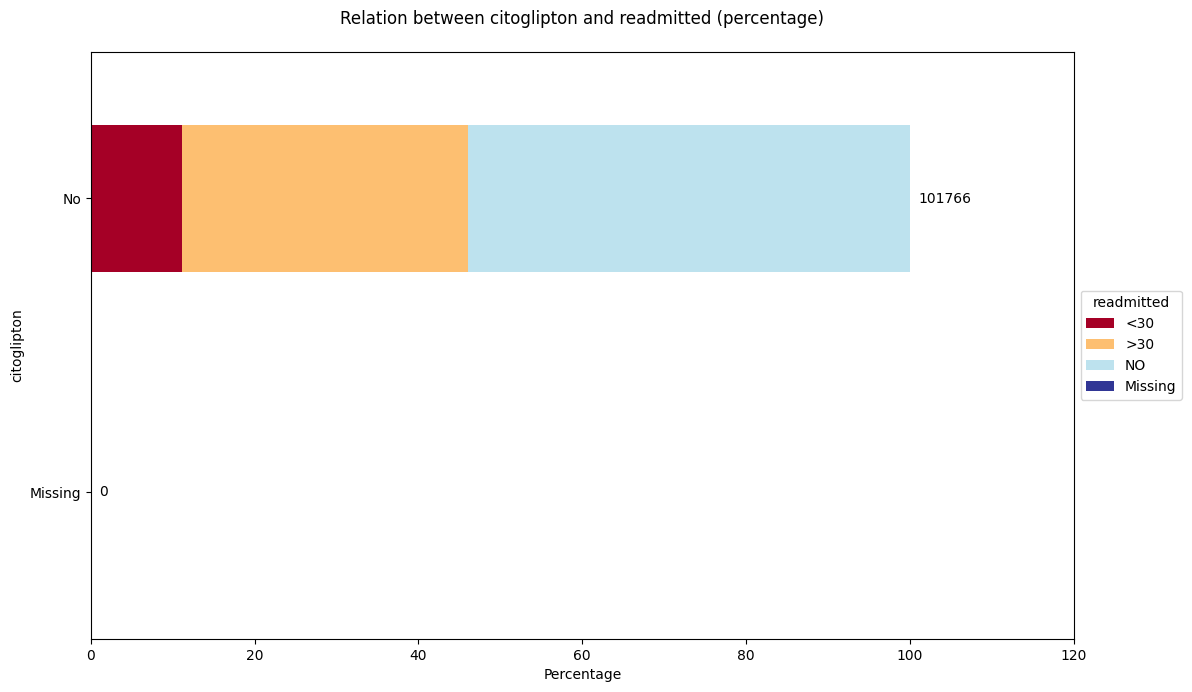

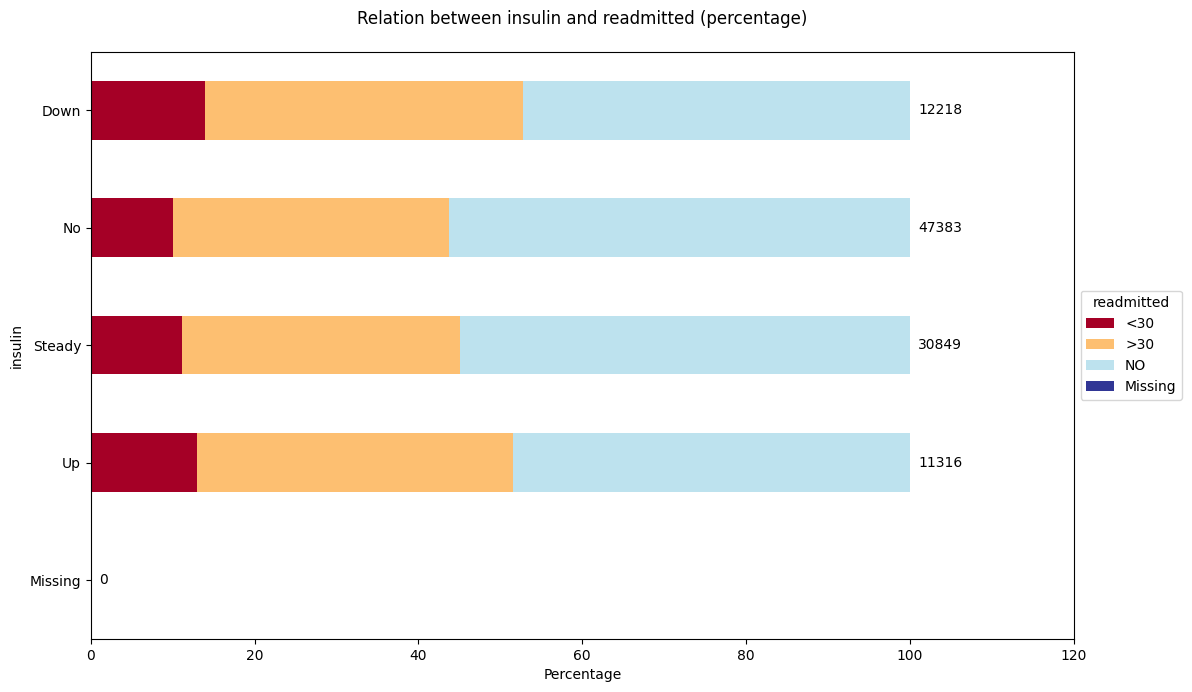

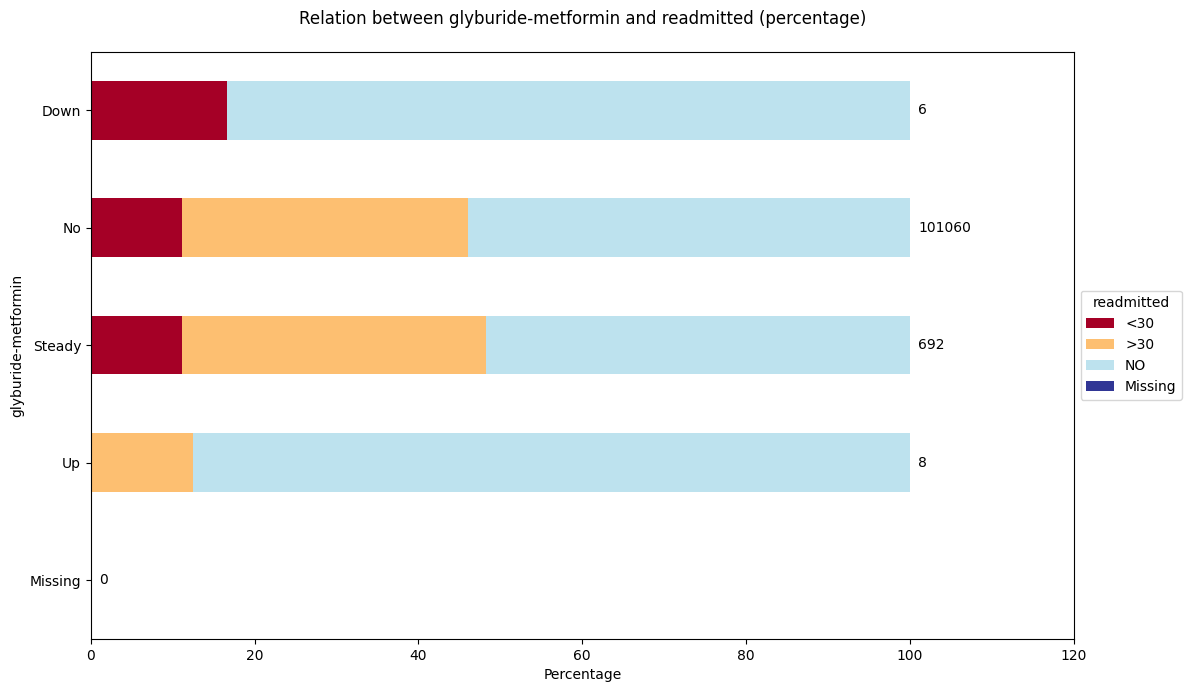

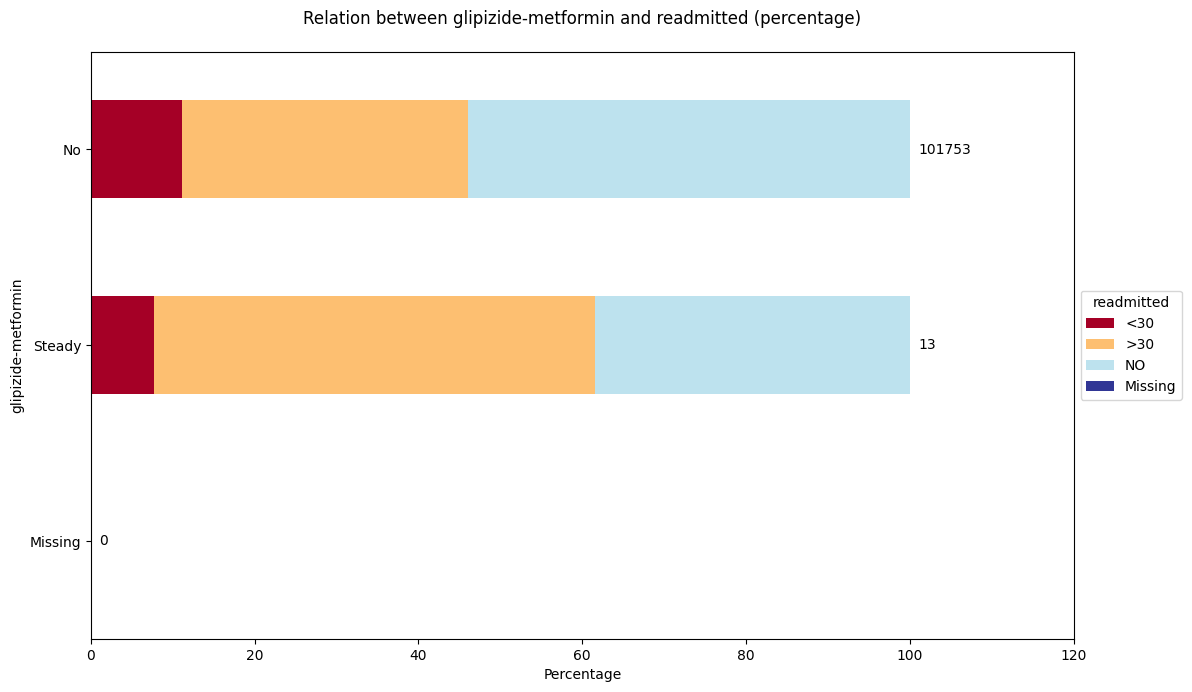

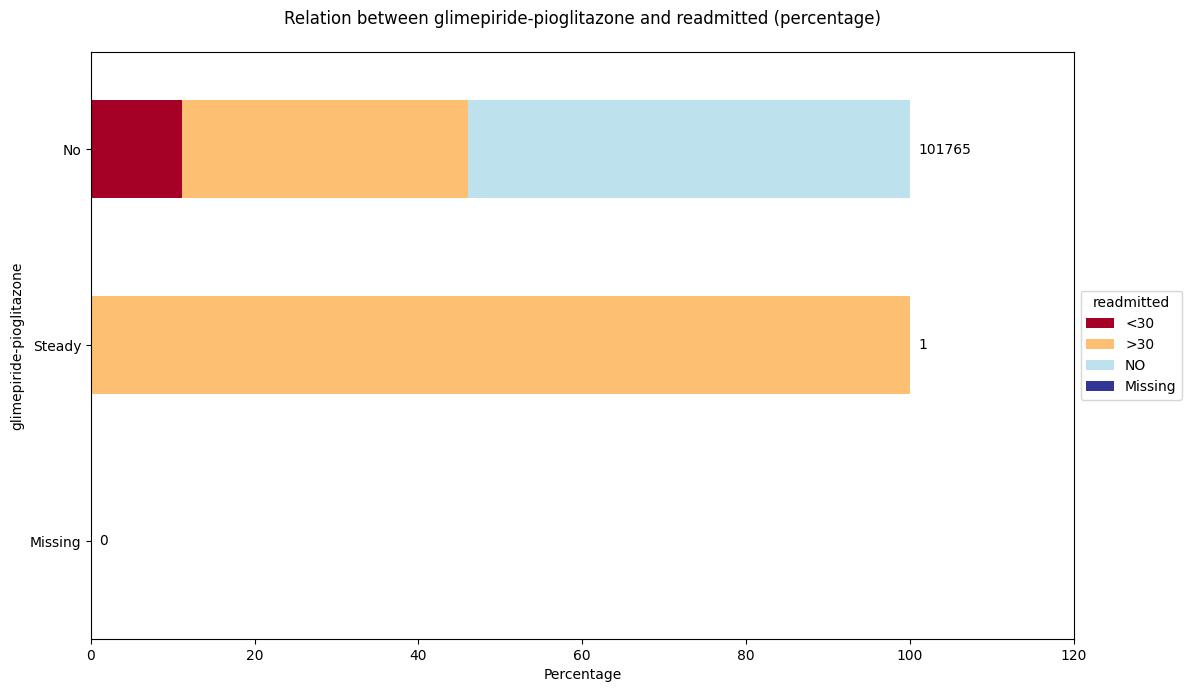

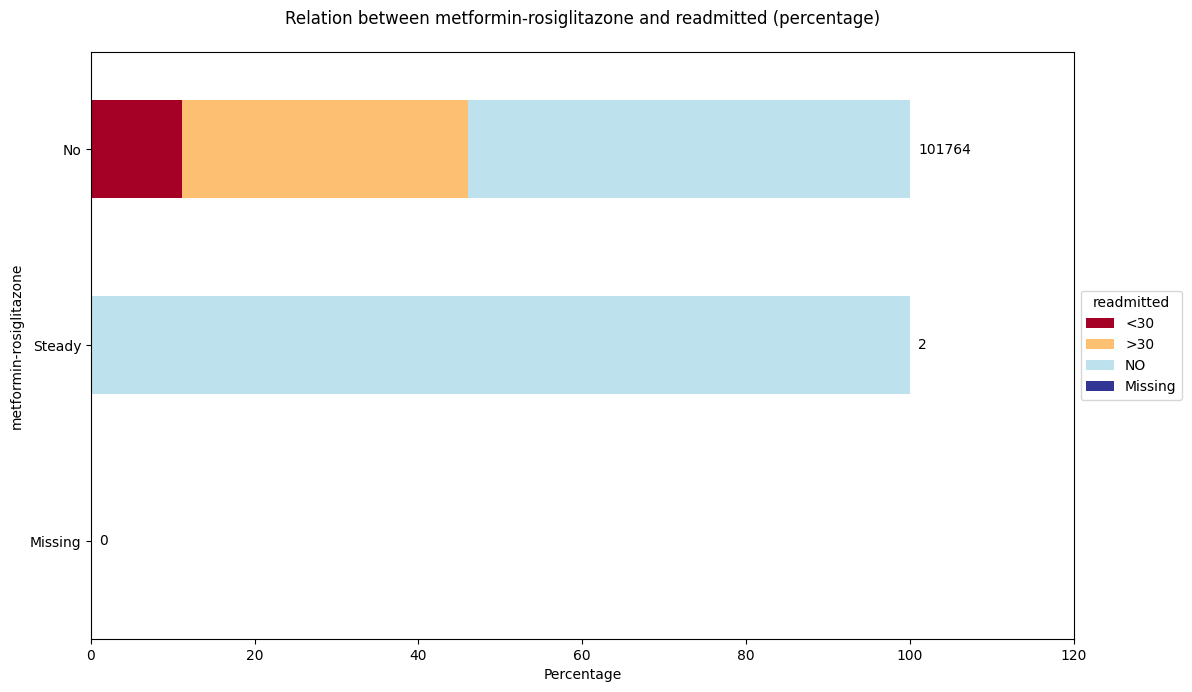

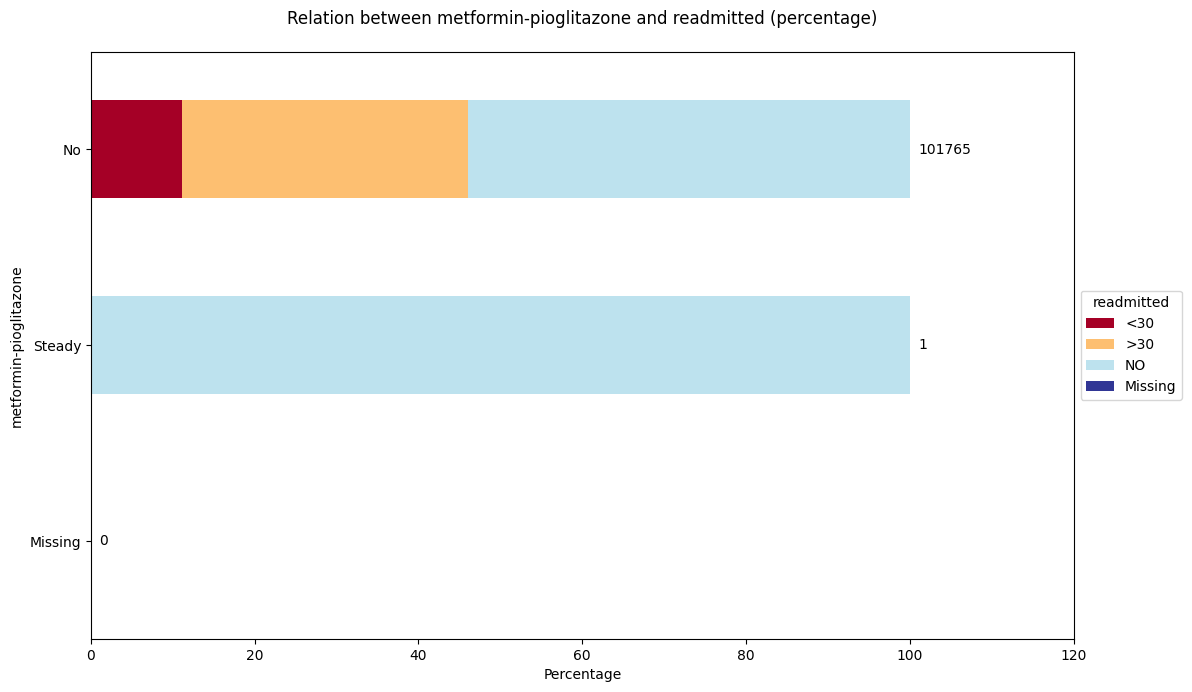

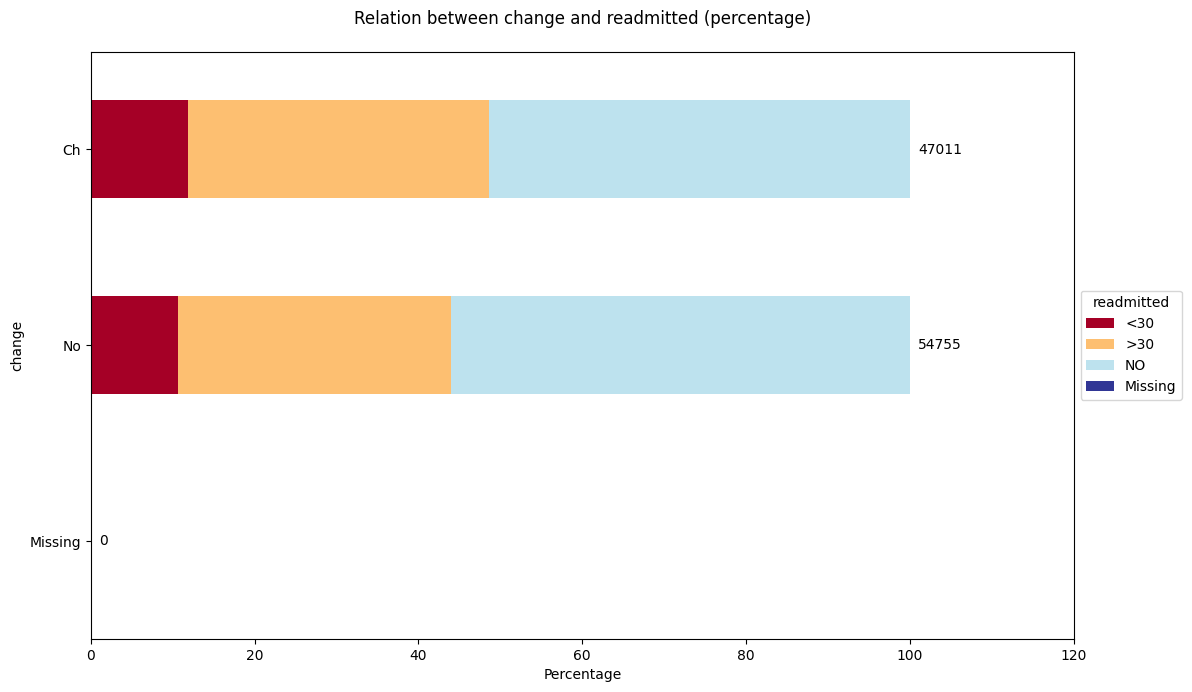

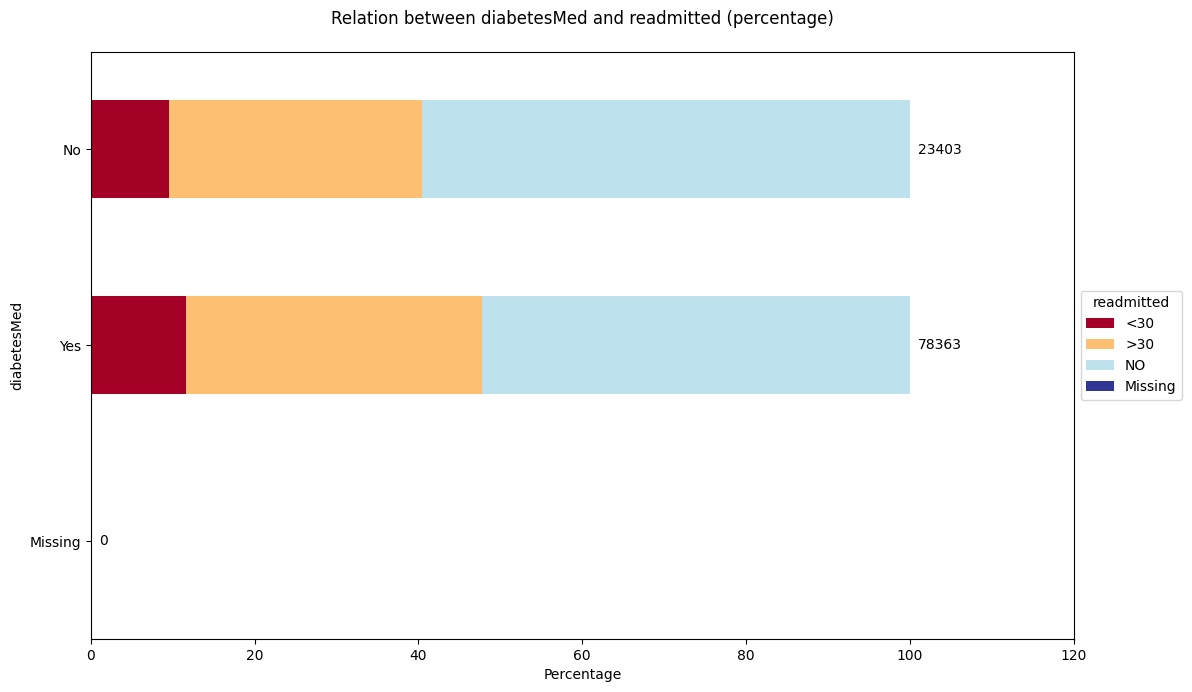

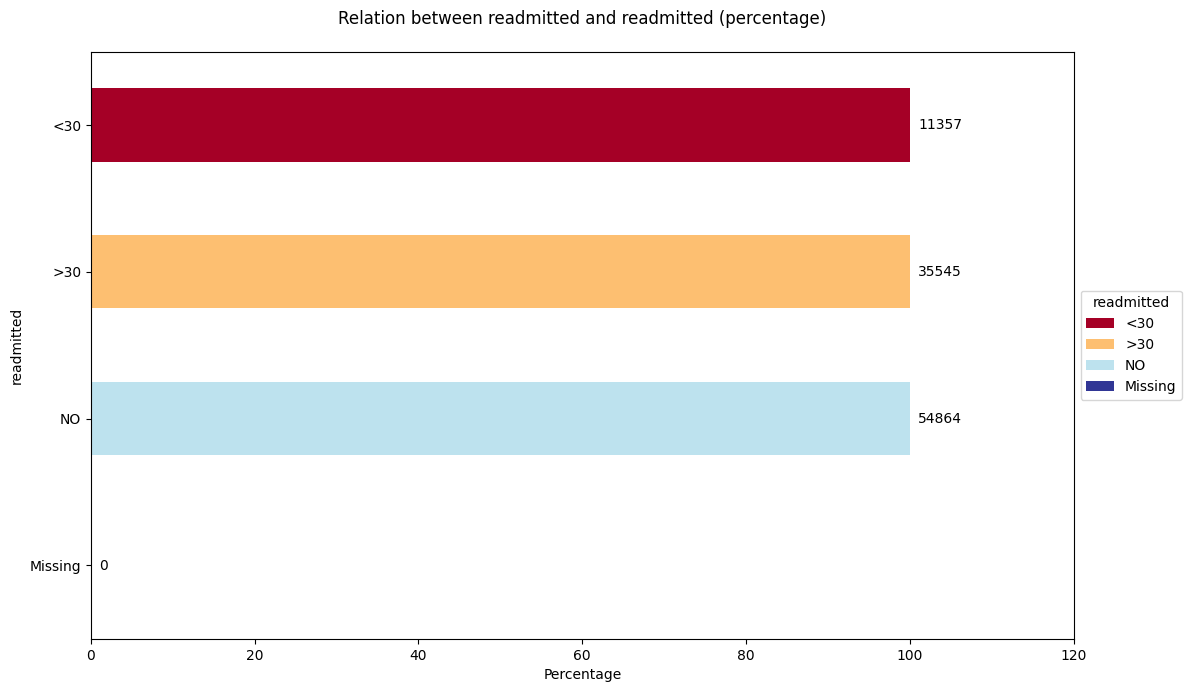

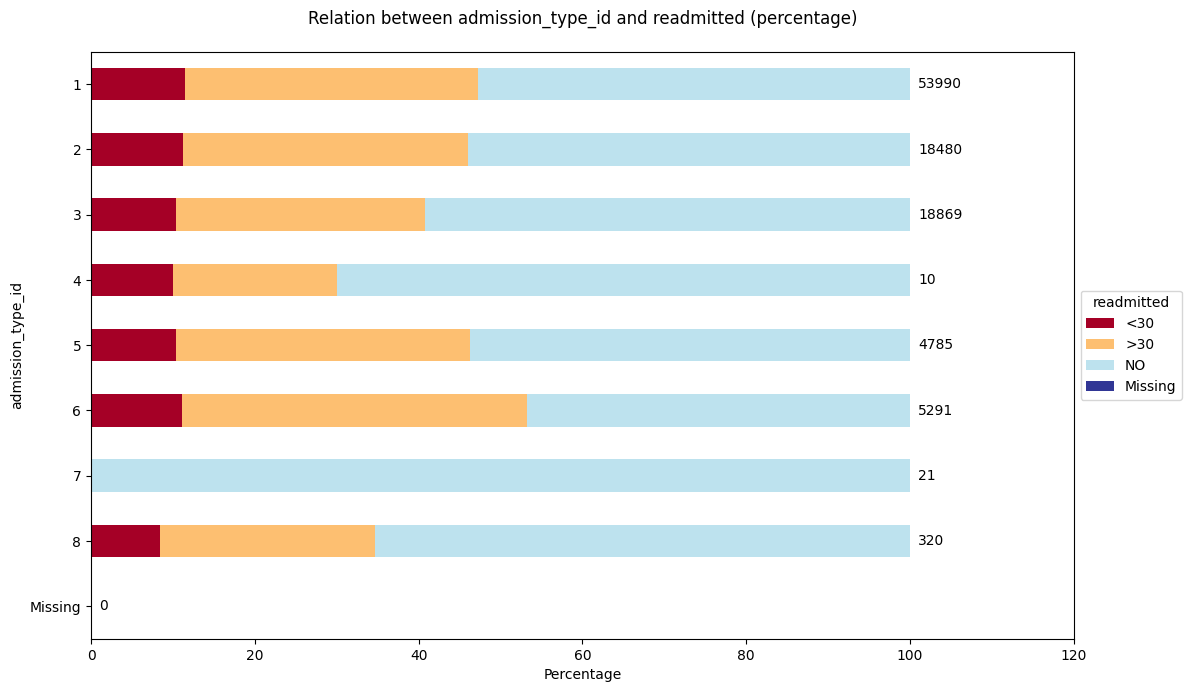

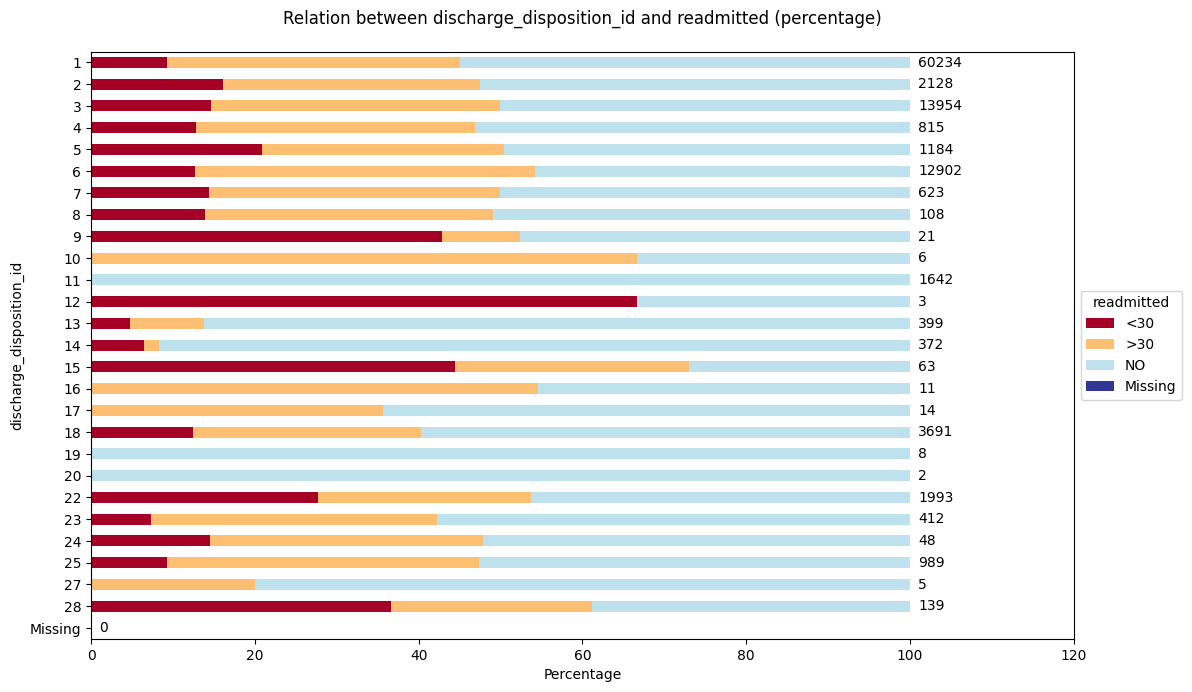

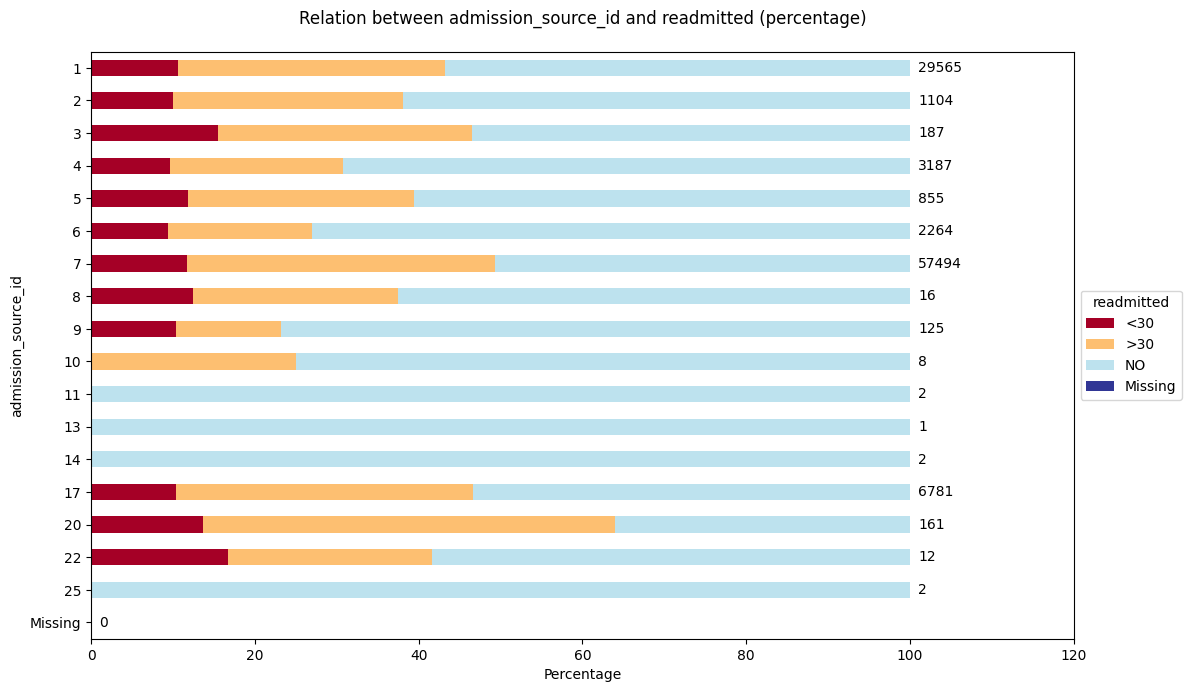

In [156]:
for var in categorical_cols: 
    if data[var].nunique()<30: 
        plot_categorical_target_relation_horizontal(data, var, 'readmitted')

In [166]:
def TestIndependence2(df, var, target, alpha=0.05):
    # Create a contingency table for the variable against the "target" column
    contingency_table = pd.crosstab(df[var], df[target])

    # Perform chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table.values)

    # Create a DataFrame for expected counts
    dfExpected = pd.DataFrame(
        expected, columns=contingency_table.columns, index=contingency_table.index
    )

    # Check the p-value and print results
    if p >= alpha:
        result = f"{var} is NOT an important predictor. (Discard {var} from model)"
        print(result)
    else:
        result = f"{var} is an important predictor. (Keep {var} in model)"
        print(result)

In [168]:
# Loop through each column in dfObserved (excluding 'target')
for var in categorical_cols:
    if var != "readmitted":
        TestIndependence2(data, var, 'readmitted')

race is an important predictor. (Keep race in model)
gender is an important predictor. (Keep gender in model)
age is an important predictor. (Keep age in model)
weight is an important predictor. (Keep weight in model)
payer_code is an important predictor. (Keep payer_code in model)
medical_specialty is an important predictor. (Keep medical_specialty in model)
diag_1 is an important predictor. (Keep diag_1 in model)
diag_2 is an important predictor. (Keep diag_2 in model)
diag_3 is an important predictor. (Keep diag_3 in model)
max_glu_serum is an important predictor. (Keep max_glu_serum in model)
A1Cresult is an important predictor. (Keep A1Cresult in model)
metformin is an important predictor. (Keep metformin in model)
repaglinide is an important predictor. (Keep repaglinide in model)
nateglinide is NOT an important predictor. (Discard nateglinide from model)
chlorpropamide is NOT an important predictor. (Discard chlorpropamide from model)
glimepiride is an important predictor. (Keep 

### 5.2. Numeric Features

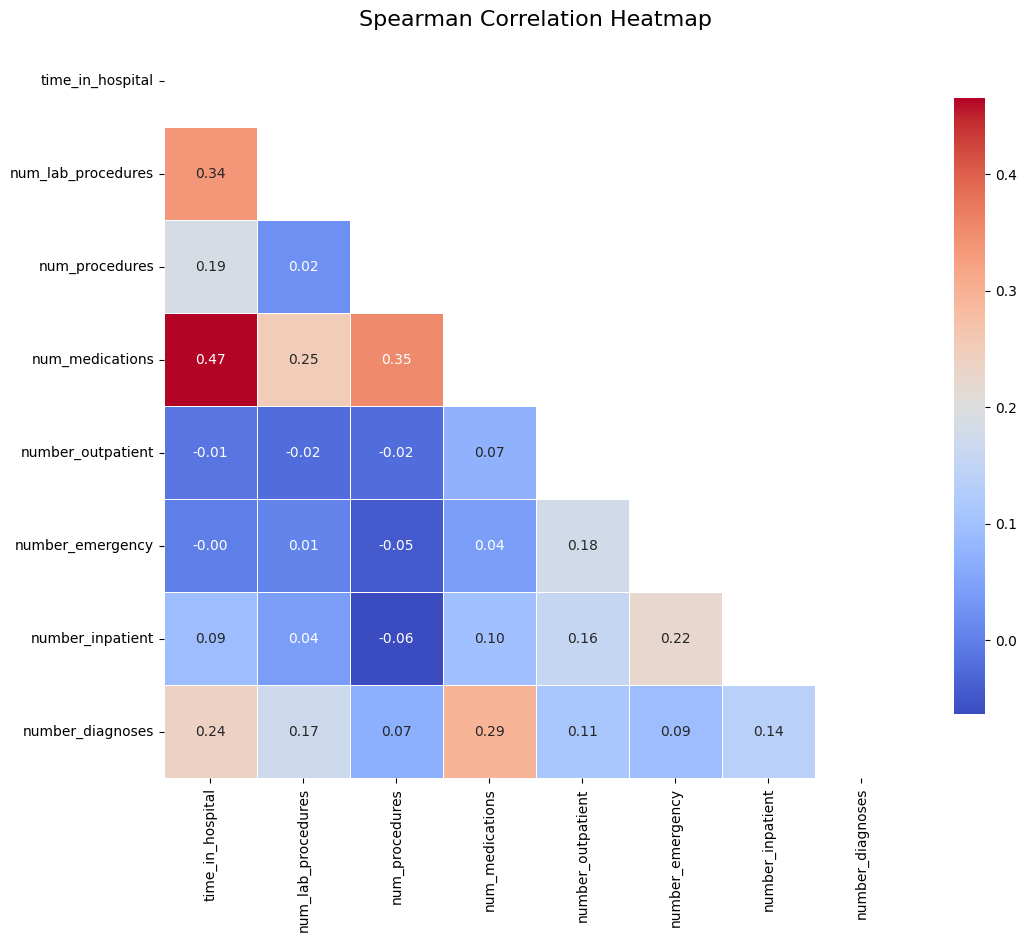

In [14]:
# Obtain the Spearman correlation matrix
cor_spearman = data[numeric_cols].corr(method="spearman")

# Create a mask for the upper triangle (if you want to hide it)
mask = np.triu(np.ones_like(cor_spearman, dtype=bool))

# Define a custom colormap (you can modify the colors as needed)
custom_cmap = sns.color_palette(
    "coolwarm", as_cmap=True
)  # Change to your preferred colormap

# Optionally, define whether to annotate or not
annot = True  # Set to True to show the correlation coefficients

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    data=cor_spearman,
    annot=annot,
    cmap=custom_cmap,
    mask=mask,
    fmt=".2f",  # Format for the annotation, use '.2f' for float
    square=True,  # Keep cells square
    linewidths=0.5,  # Add lines between cells for clarity
    cbar_kws={"shrink": 0.8},
)  # Adjust the colorbar size

# Add title
plt.title("Spearman Correlation Heatmap", fontsize=16)

# Show the heatmap
plt.show()

In [129]:
def histograms_numeric_target(df, target_variable, variable2):
    fig, ax = plt.subplots(1, 3, figsize=(30, 3))

    for i, cat in enumerate(df[target_variable].value_counts().index):
        viz_df = df[df[target_variable] == cat]
        sns.histplot(viz_df[variable2], ax=ax[i], color="#e0bda8")
        ax[i].set_title(cat)

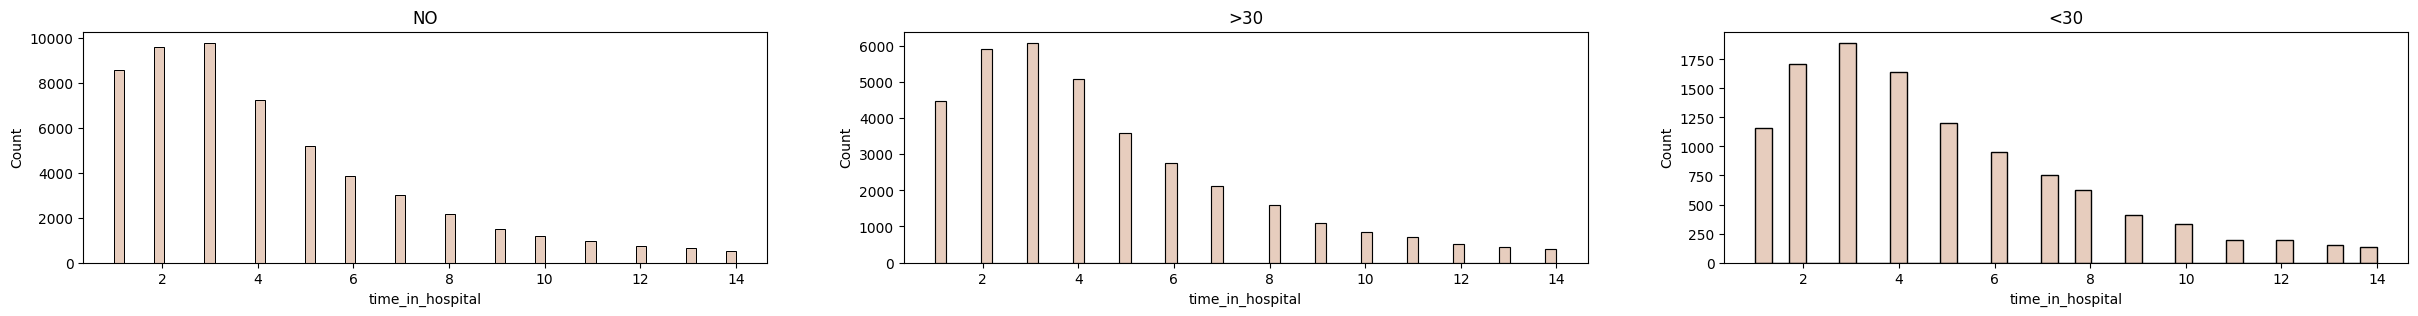

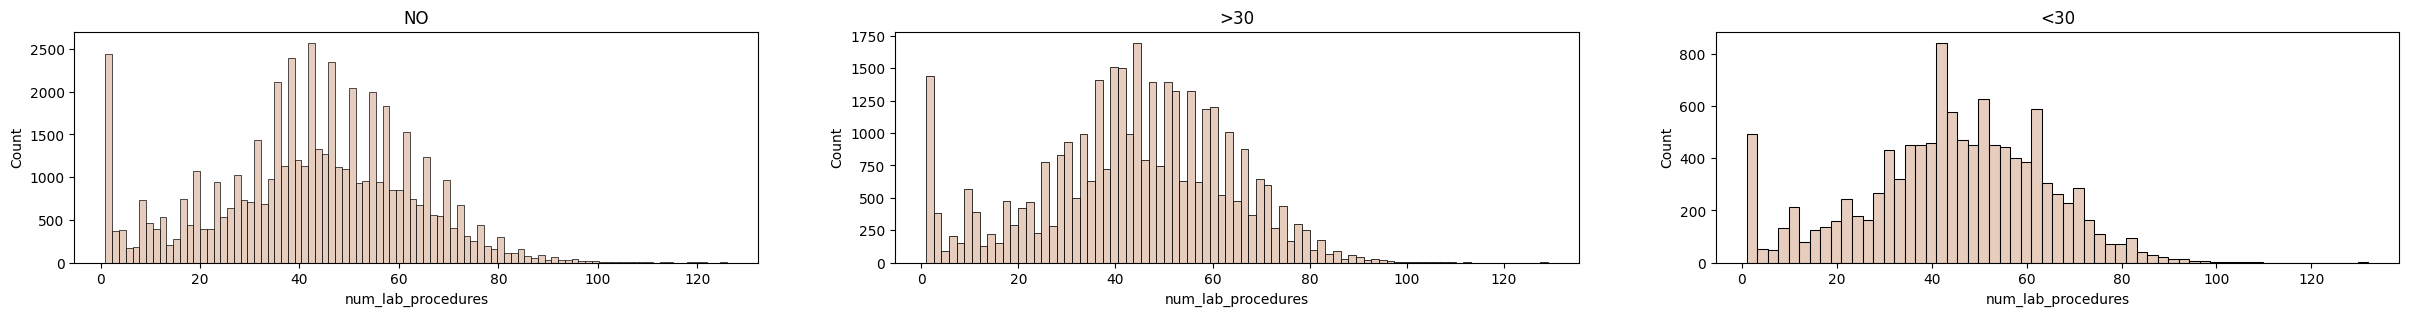

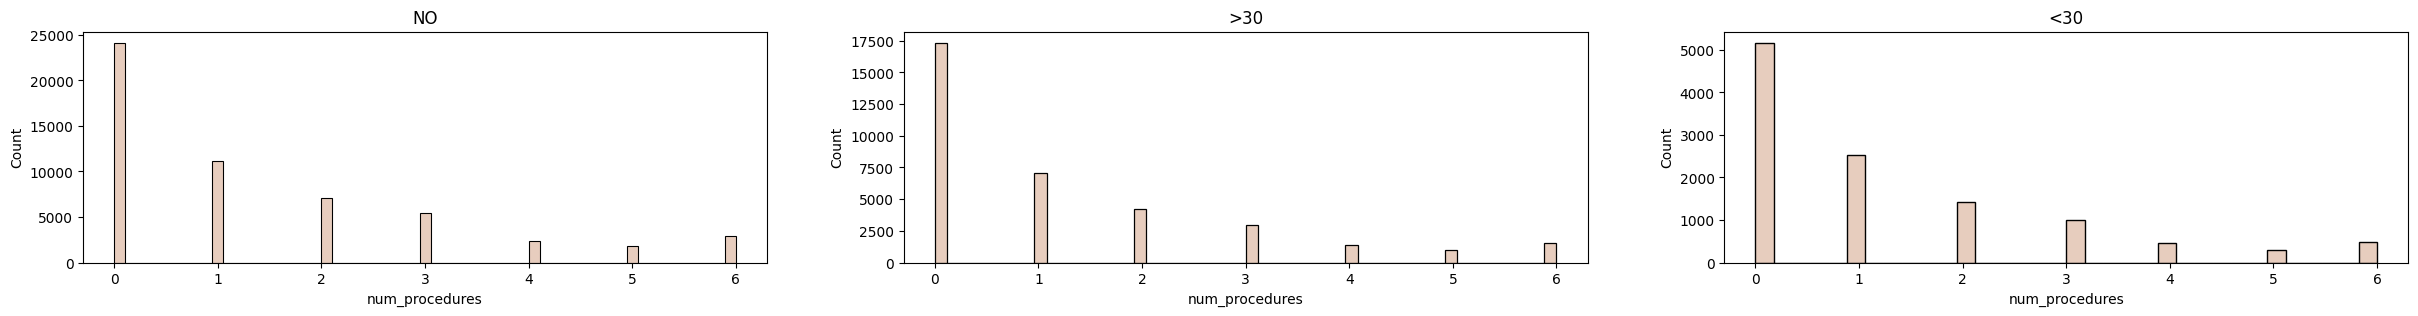

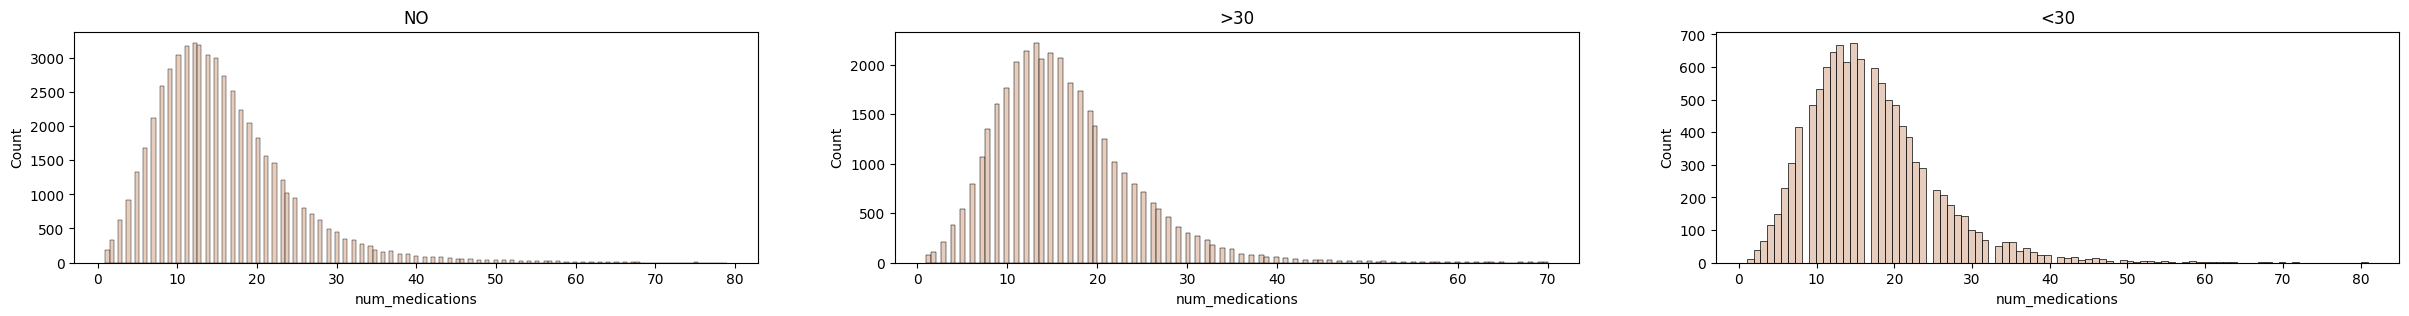

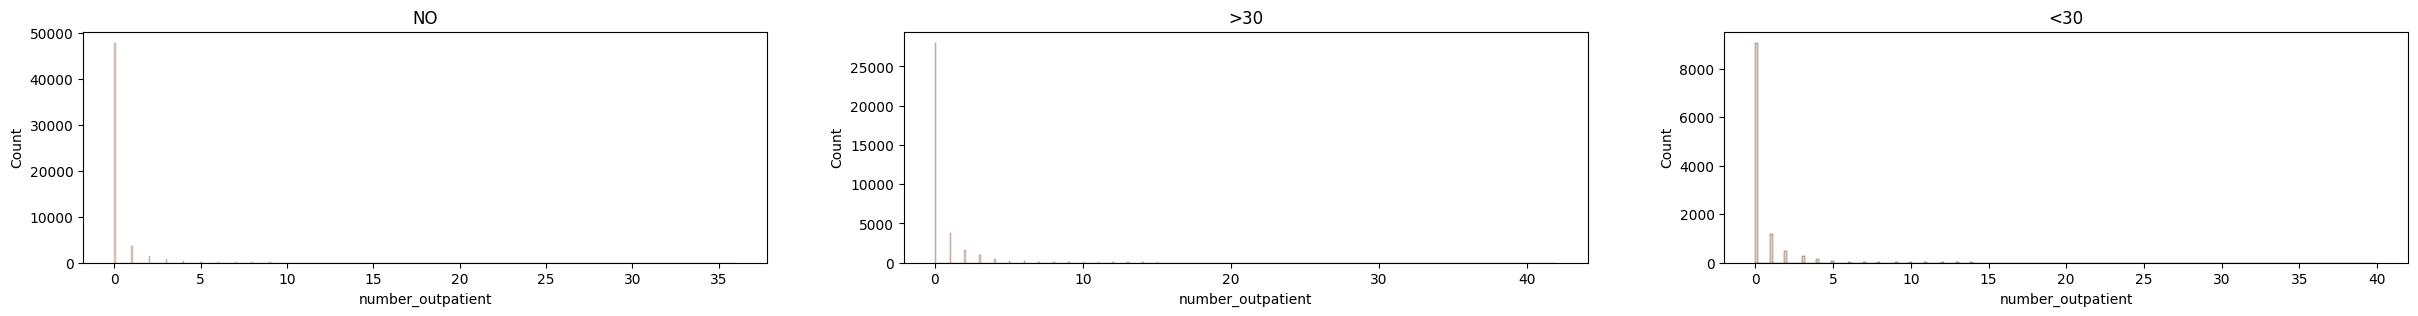

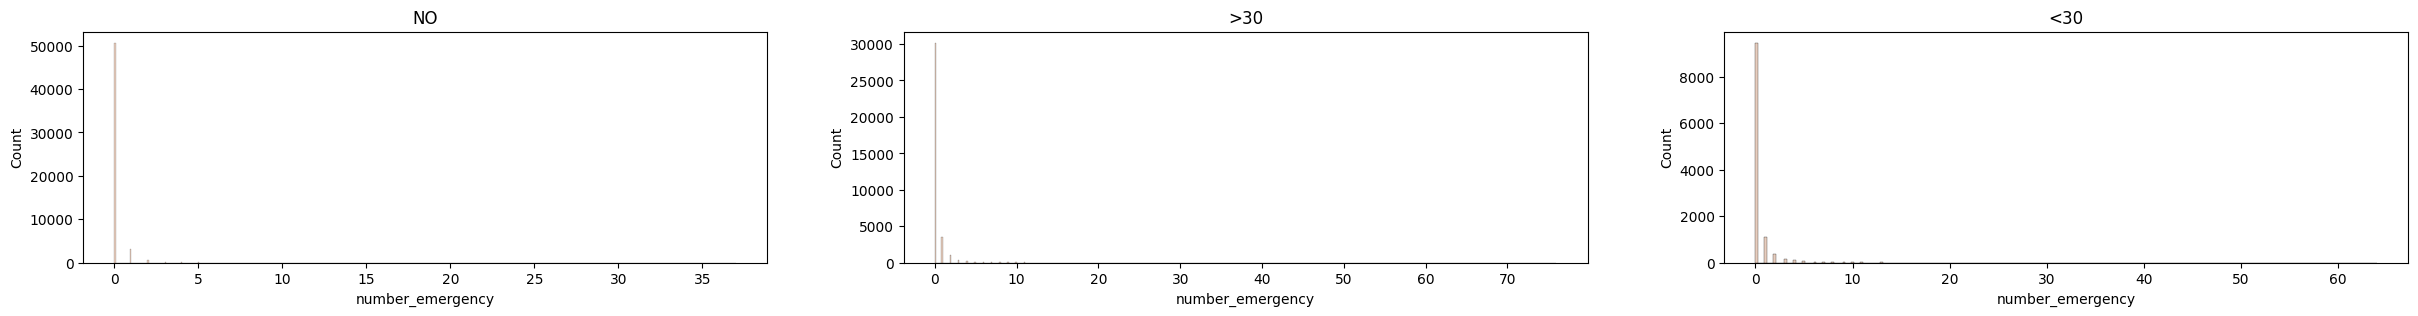

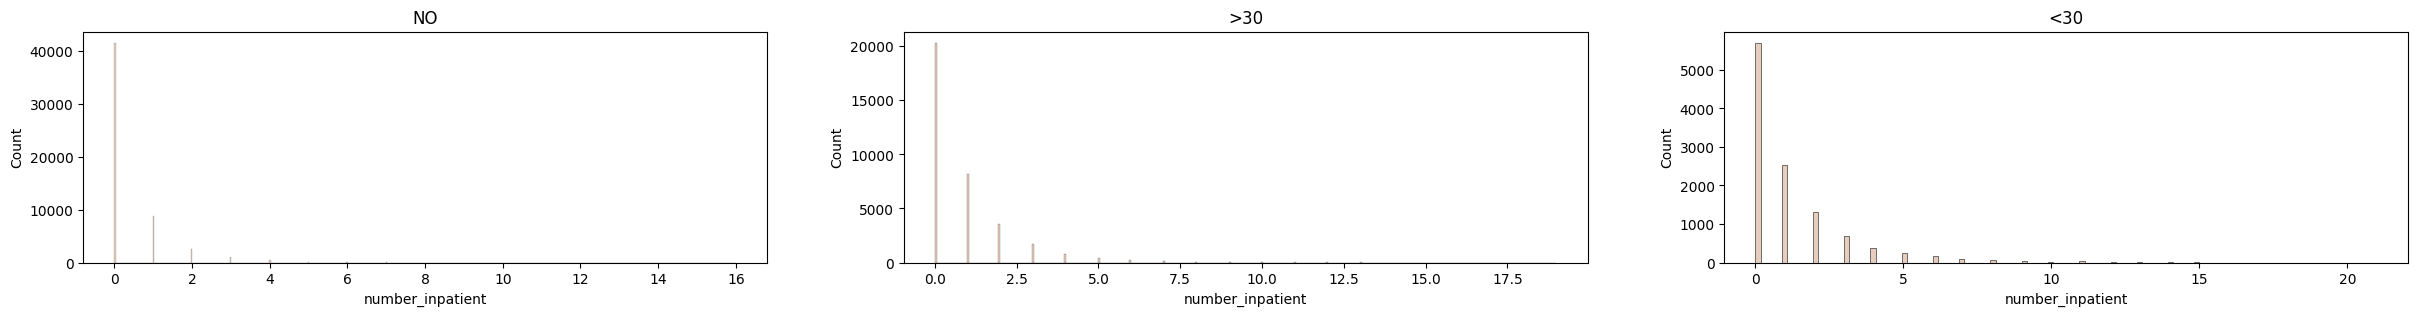

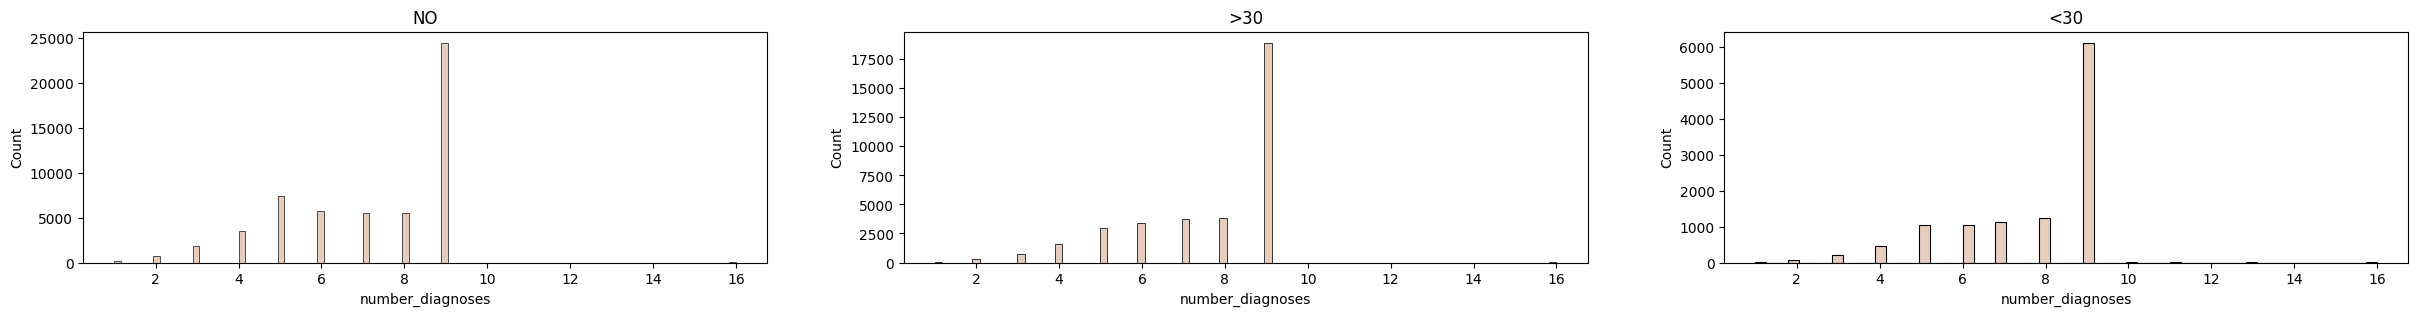

In [131]:
for var in numeric_cols:
    histograms_numeric_target(data, "readmitted", var)

In [133]:
def plot_boxplot(df, target_var, numeric_var):
    
    # Calculate the count and percentage of each category in the target variable
    target_counts = df[target_var].value_counts()
    total_observations = len(df)
    target_percentages = (target_counts / total_observations) * 100

    # Create a dictionary for quick lookup of each category's percentage
    percentage_labels = {
        category: f"{category} ({perc:.1f}%)"
        for category, perc in zip(target_counts.index, target_percentages)
    }

    # Create the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        data=df,
        x=target_var,
        y=numeric_var,
        hue=target_var,  # Assign target variable to hue
        palette="RdYlBu",
        dodge=False,  # Avoid duplicate legends
    )

    # Set the title and labels
    plt.title(f"Distribution of {numeric_var} by {target_var}")
    plt.xlabel(target_var)
    plt.ylabel(numeric_var)

    # Set tick labels with percentages
    plt.xticks(
        ticks=range(len(target_counts)),
        labels=[percentage_labels[category] for category in target_counts.index],
        rotation=45,
    )

    # Show the plot
    plt.tight_layout()
    plt.show()

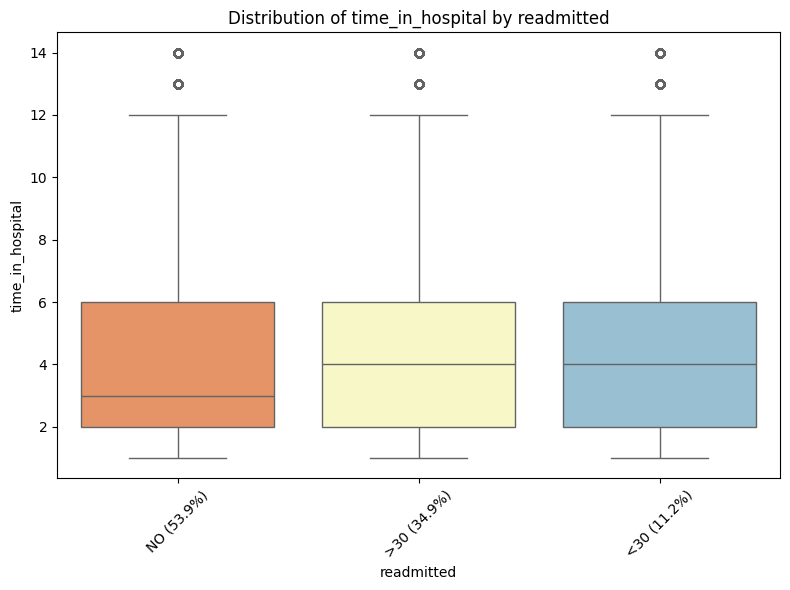

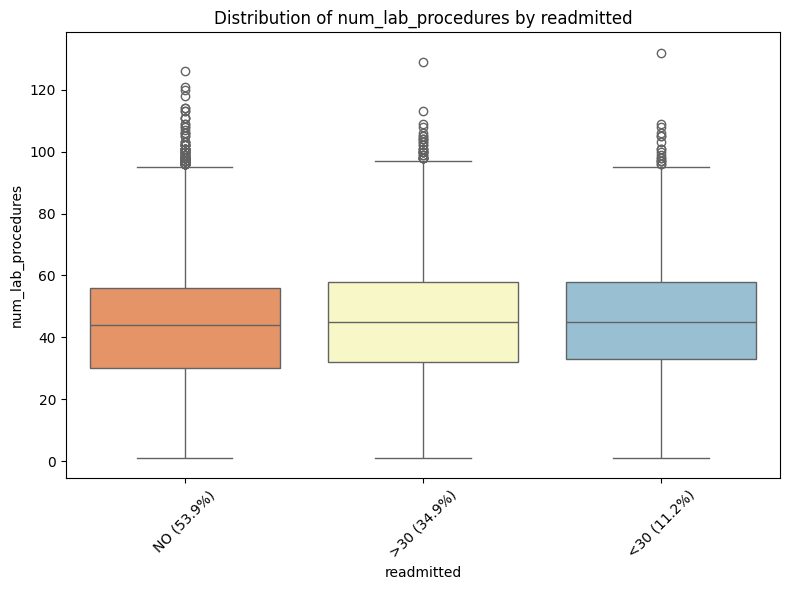

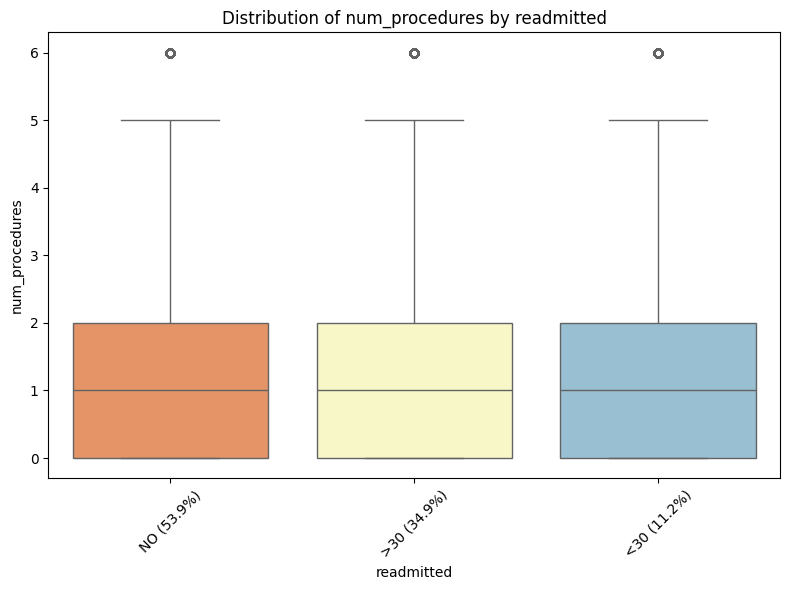

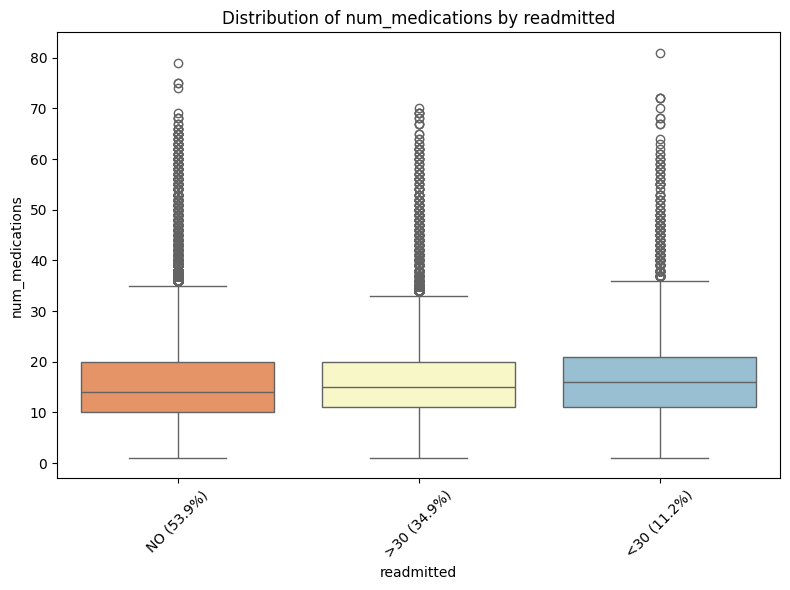

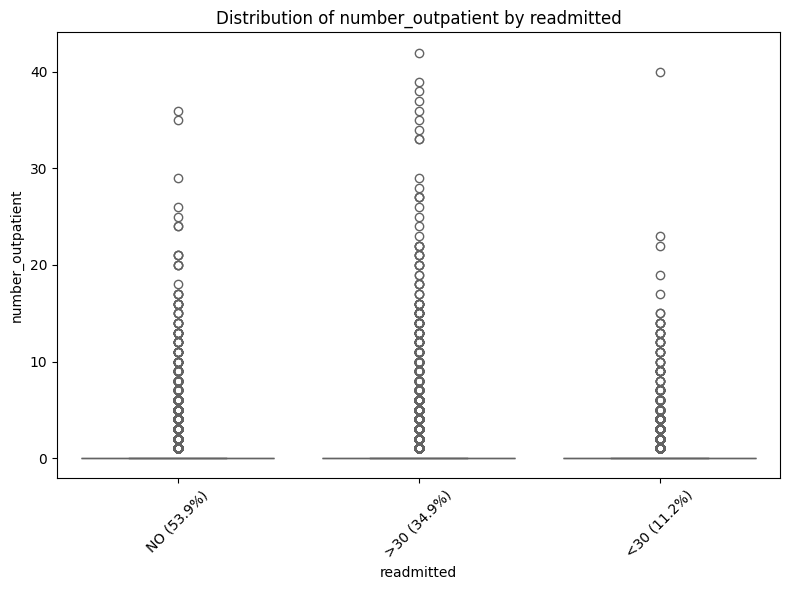

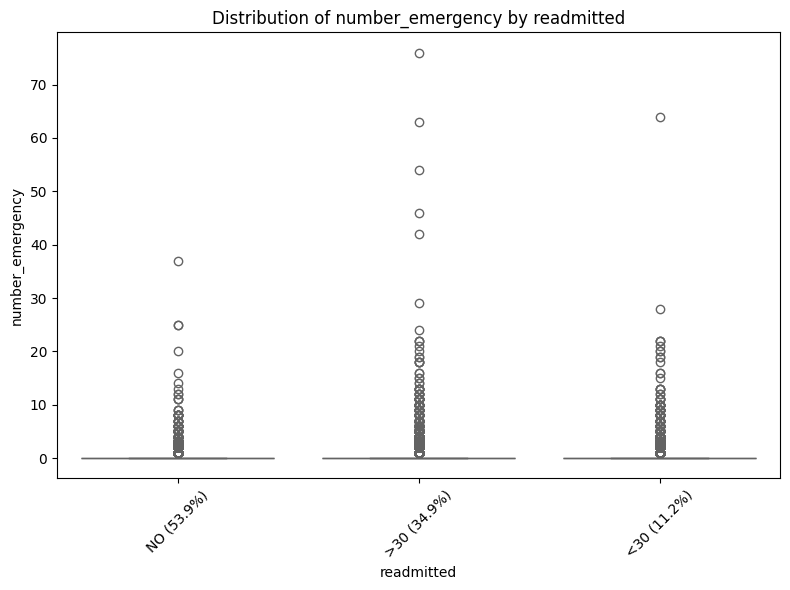

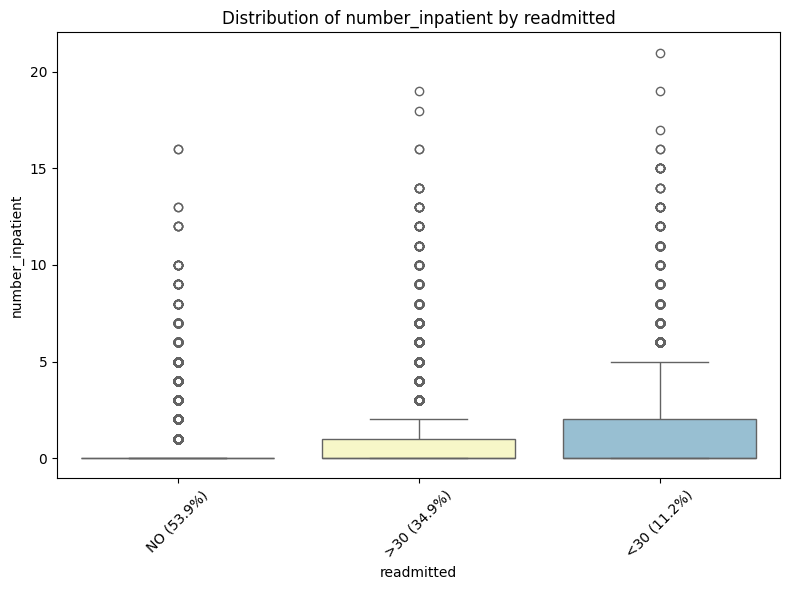

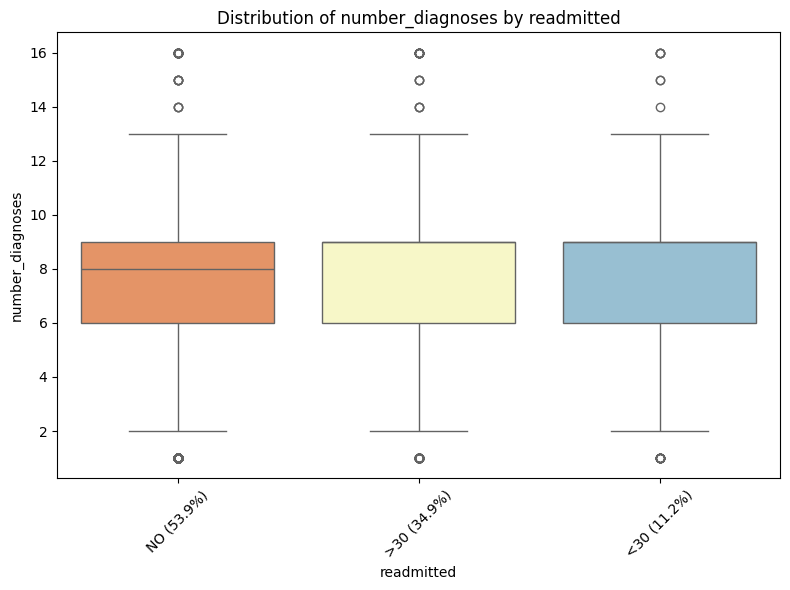

In [135]:
for var in numeric_cols: 
    plot_boxplot(data, 'readmitted', var)

In [150]:
for var in numeric_cols: 
    groups = [data[data['readmitted'] == val][var] for val in data['readmitted'].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"The p-value obtained for {var} was {p_val}")

The p-value obtained for time_in_hospital was 1.411815390386835e-74
The p-value obtained for num_lab_procedures was 1.557243276756841e-35
The p-value obtained for num_procedures was 1.1975406517965434e-45
The p-value obtained for num_medications was 4.900463977647552e-60
The p-value obtained for number_outpatient was 1.82159082912971e-154
The p-value obtained for number_emergency was 2.688984098469832e-248
The p-value obtained for number_inpatient was 0.0
The p-value obtained for number_diagnoses was 1.422802215865904e-283


In [142]:
X = data[numeric_cols]
y = data['readmitted']  

mi = mutual_info_classif(X, y, discrete_features=False)
importances = pd.Series(mi, index=numeric_cols).sort_values(ascending=False)
print(importances)

number_inpatient      0.030029
number_diagnoses      0.012925
number_emergency      0.010143
number_outpatient     0.006848
num_lab_procedures    0.002435
num_medications       0.002302
num_procedures        0.000887
time_in_hospital      0.000348
dtype: float64
